In [2]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
from os.path import expandvars
import scipy.constants as spc
import scipy as sc
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi2
import scipy

In [13]:
'''

Functions used

'''

def gaussian(x, pos, wid, amp):
    y = amp*np.exp(-4*np.log(2)*((x-pos)/(wid))**2)
    return y

def biGauss(x, pos, wid, r, amp):
    mask = x < pos

    y_all = ([])
    for i in range(0, len(mask)):

        if mask[i] == True:
            m = 1
            nm = 0
        else:
            m = 0
            nm = 1
        if r != 0:
            y1 = gaussian(x[i],pos,r*wid/(r+1),amp)*m
            y2 = gaussian(x[i],pos,wid/(r+1),amp)*nm
            y = y1 + y2
        else:
            y = gaussian(x[i],pos,wid, amp)*nm

        y_all = np.append(y_all, y)
    return y_all

def double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    b1 = biGauss(x, pos1, wid1, r1, amp1)
    b2 = biGauss(x, pos2, wid2, r2, amp2)
    b = np.append(b1, b2)
    return b1+b2

def log_likelihood_biGauss(theta, n, x):
    pos, wid, r, amp = theta
    model = biGauss(x, pos, wid, r, amp)
    L = np.log(scipy.special.factorial(n)) + model - (n*np.log(model))
    print('*****************One Peak***************')
    print(theta)
    return np.sum(L)

def log_likelihood_doublePeak(theta, n, x):
    pos1, wid1, r1, amp1, pos2, wid2, r2, amp2 = theta
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    L = np.log(scipy.special.factorial(n)) + model - (n*np.log(model))
    print('*****************Double Peak***************')
    print(theta)
    return np.sum(L)

def likelihood_ratio_doublePeak(x, n, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2):
    model = double_peak(x, pos1, wid1, r1, amp1, pos2, wid2, r2, amp2)
    val = model - n + (n*np.log(n/model))
    #print('log - ', n/model, 'n - ', n)
    return np.sum(val)

def likelihood_ratio_biGauss(x, n, pos, wid, r, amp):
    model = biGauss(x, pos, wid, r, amp)
    val = model - n + (n*np.log(n/model))
    #print('log - ', n/model, 'n - ', n)
    return np.sum(val)

In [14]:
'''

Loading the geometry

'''

gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')

loaded geometry


('FILE NUMBER - ', 96)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 1)
('frame num - ', 1)
LOG LIKELIHOOD
----------BOUNDS-----------
((-15.895478874444962, 12.104521125555038), (0, 100), (0, 10), (0, 1000000.0))
*****************One Peak***************
[3.27757397e-10 2.00000000e+01 1.00000000e+00 7.17000000e+02]
*****************One Peak***************
[3.27757397e-10 2.00000000e+01 1.00000000e+00 7.17000000e+02]
*****************One Peak***************
[  1.  20.   1. 717.]
*****************One Peak***************
[  2.618034  20.         1.       717.      ]
*****************One Peak***************
[  1.  20.   1. 717.]
*****************One Peak***************
[  1.61803398  20.           1.         717.        ]
*****************One Peak***************
[  1.99999998  20.           1.         717.        ]
*****************One Peak***************
[  2.23606797  20.           1.         717. 

*****************One Peak***************
[  5.17585792  25.17585792   6.17585792 722.11579301]
*****************One Peak***************
[  5.17585792  25.17585792   6.17585792 722.15023486]
*****************One Peak***************
[  5.17585792  25.17585792   6.17585792 722.17585792]
*****************One Peak***************
[  7.76378688  27.76378688   8.76378688 724.76378688]
*****************One Peak***************
[  5.17585792  25.17585792   6.17585792 722.17585792]
*****************One Peak***************
[  6.17585792  25.17585792   6.17585792 722.17585792]
*****************One Peak***************
[  7.79389192  25.17585792   6.17585792 722.17585792]
*****************One Peak***************
[  6.17585792  25.17585792   6.17585792 722.17585792]
*****************One Peak***************
[  6.7938919   25.17585792   6.17585792 722.17585792]
*****************One Peak***************
[  7.17585791  25.17585792   6.17585792 722.17585792]
*****************One Peak***************
[  7.4119

*****************One Peak***************
[ 12.93964481  32.93964481  11.35171585 727.35171585]
*****************One Peak***************
[ 12.93964481  32.93964481  11.35171585 727.35171585]
*****************One Peak***************
[ 12.93964481  32.93964481  12.35171585 727.35171585]
*****************One Peak***************
[ 12.93964481  32.93964481  13.96974985 727.35171585]
*****************One Peak***************
[ 12.93964481  32.93964481  12.35171585 727.35171585]
*****************One Peak***************
[ 12.93964481  32.93964481  12.96974982 727.35171585]
*****************One Peak***************
[ 12.93964481  32.93964481  13.35171583 727.35171585]
*****************One Peak***************
[ 12.93964481  32.93964481  13.58778381 727.35171585]
*****************One Peak***************
[ 12.93964481  32.93964481  13.73368185 727.35171585]
*****************One Peak***************
[ 12.93964481  32.93964481  13.8238518  727.35171585]
*****************One Peak***************
[ 12.9396

*****************One Peak***************
[ 20.70343169  39.11550273  19.11550273 735.11550273]
*****************One Peak***************
[ 20.70343169  40.73353673  19.11550273 735.11550273]
*****************One Peak***************
[ 20.70343169  39.11550273  19.11550273 735.11550273]
*****************One Peak***************
[ 20.70343169  39.73353671  19.11550273 735.11550273]
*****************One Peak***************
[ 20.70343169  40.11550272  19.11550273 735.11550273]
*****************One Peak***************
[ 20.70343169  40.3515707   19.11550273 735.11550273]
*****************One Peak***************
[ 20.70343169  40.49746873  19.11550273 735.11550273]
*****************One Peak***************
[ 20.70343169  40.58763868  19.11550273 735.11550273]
*****************One Peak***************
[ 20.70343169  40.64336678  19.11550273 735.11550273]
*****************One Peak***************
[ 20.70343169  40.67780863  19.11550273 735.11550273]
*****************One Peak***************
[ 20.7034

*****************One Peak***************
[ 28.35142557  45.87928962  26.87928962 742.87928962]
*****************One Peak***************
[ 28.40715366  45.87928962  26.87928962 742.87928962]
*****************One Peak***************
[ 28.44159552  45.87928962  26.87928962 742.87928962]
*****************One Peak***************
[ 28.46721858  45.87928962  26.87928962 742.87928962]
*****************One Peak***************
[ 28.46721858  45.87928962  26.87928962 742.87928962]
*****************One Peak***************
[ 28.46721858  46.87928962  26.87928962 742.87928962]
*****************One Peak***************
[ 28.46721858  48.49732362  26.87928962 742.87928962]
*****************One Peak***************
[ 28.46721858  46.87928962  26.87928962 742.87928962]
*****************One Peak***************
[ 28.46721858  47.49732359  26.87928962 742.87928962]
*****************One Peak***************
[ 28.46721858  47.8792896   26.87928962 742.87928962]
*****************One Peak***************
[ 28.4672

*****************One Peak***************
[ 34.6430765  53.6430765  34.6430765 750.6430765]
*****************One Peak***************
[ 35.26111048  53.6430765   34.6430765  750.6430765 ]
*****************One Peak***************
[ 35.64307648  53.6430765   34.6430765  750.6430765 ]
*****************One Peak***************
[ 35.87914447  53.6430765   34.6430765  750.6430765 ]
*****************One Peak***************
[ 36.0250425  53.6430765  34.6430765 750.6430765]
*****************One Peak***************
[ 36.11521245  53.6430765   34.6430765  750.6430765 ]
*****************One Peak***************
[ 36.17094055  53.6430765   34.6430765  750.6430765 ]
*****************One Peak***************
[ 36.2053824  53.6430765  34.6430765 750.6430765]
*****************One Peak***************
[ 36.23100546  53.6430765   34.6430765  750.6430765 ]
*****************One Peak***************
[ 36.23100546  53.6430765   34.6430765  750.6430765 ]
*****************One Peak***************
[ 36.23100546  54.643

*****************One Peak***************
[ 41.40686339  61.40686338  42.40686338 758.38124033]
*****************One Peak***************
[ 41.40686339  61.40686338  42.40686338 758.40686338]
*****************One Peak***************
[ 43.99479235  63.99479235  44.99479235 760.99479235]
*****************One Peak***************
[ 41.40686339  61.40686338  42.40686338 758.40686338]
*****************One Peak***************
[ 42.40686339  61.40686338  42.40686338 758.40686338]
*****************One Peak***************
[ 44.02489739  61.40686338  42.40686338 758.40686338]
*****************One Peak***************
[ 42.40686339  61.40686338  42.40686338 758.40686338]
*****************One Peak***************
[ 43.02489736  61.40686338  42.40686338 758.40686338]
*****************One Peak***************
[ 43.40686337  61.40686338  42.40686338 758.40686338]
*****************One Peak***************
[ 43.64293135  61.40686338  42.40686338 758.40686338]
*****************One Peak***************
[ 43.7888

*****************One Peak***************
[ 49.17065027  69.17065027  50.17065027 766.20075531]
*****************One Peak***************
[ 49.17065027  69.17065027  50.17065027 764.58272131]
*****************One Peak***************
[ 49.17065027  69.17065027  50.17065027 765.20075528]
*****************One Peak***************
[ 49.17065027  69.17065027  50.17065027 765.58272129]
*****************One Peak***************
[ 49.17065027  69.17065027  50.17065027 765.81878927]
*****************One Peak***************
[ 49.17065027  69.17065027  50.17065027 765.96468731]
*****************One Peak***************
[ 49.17065027  69.17065027  50.17065027 766.05485726]
*****************One Peak***************
[ 49.17065027  69.17065027  50.17065027 766.11058535]
*****************One Peak***************
[ 49.17065027  69.17065027  50.17065027 766.14502721]
*****************One Peak***************
[ 49.17065027  69.17065027  50.17065027 766.17065027]
*****************One Peak***************
[ 51.7585

*****************One Peak***************
[ 56.93443715  76.93443715  57.90881409 771.34650819]
*****************One Peak***************
[ 56.93443715  76.93443715  57.93443715 771.34650819]
*****************One Peak***************
[ 56.93443715  76.93443715  57.93443715 771.34650819]
*****************One Peak***************
[ 56.93443715  76.93443715  57.93443715 772.34650819]
*****************One Peak***************
[ 56.93443715  76.93443715  57.93443715 773.96454219]
*****************One Peak***************
[ 56.93443715  76.93443715  57.93443715 772.34650819]
*****************One Peak***************
[ 56.93443715  76.93443715  57.93443715 772.96454217]
*****************One Peak***************
[ 56.93443715  76.93443715  57.93443715 773.34650818]
*****************One Peak***************
[ 56.93443715  76.93443715  57.93443715 773.58257616]
*****************One Peak***************
[ 56.93443715  76.93443715  57.93443715 773.7284742 ]
*****************One Peak***************
[ 56.9344

*****************One Peak***************
[ 64.69822404  84.69822404  63.11029508 779.11029508]
*****************One Peak***************
[ 64.69822404  84.69822404  63.11029508 779.11029508]
*****************One Peak***************
[ 64.69822404  84.69822404  64.11029508 779.11029508]
*****************One Peak***************
[ 64.69822404  84.69822404  65.72832908 779.11029508]
*****************One Peak***************
[ 64.69822404  84.69822404  64.11029508 779.11029508]
*****************One Peak***************
[ 64.69822404  84.69822404  64.72832905 779.11029508]
*****************One Peak***************
[ 64.69822404  84.69822404  65.11029506 779.11029508]
*****************One Peak***************
[ 64.69822404  84.69822404  65.34636304 779.11029508]
*****************One Peak***************
[ 64.69822404  84.69822404  65.49226108 779.11029508]
*****************One Peak***************
[ 64.69822404  84.69822404  65.58243103 779.11029508]
*****************One Peak***************
[ 64.6982

*****************One Peak***************
[ 72.46201092  91.49211594  70.87408196 786.87408196]
*****************One Peak***************
[ 72.46201092  91.87408195  70.87408196 786.87408196]
*****************One Peak***************
[ 72.46201092  92.11014993  70.87408196 786.87408196]
*****************One Peak***************
[ 72.46201092  92.25604797  70.87408196 786.87408196]
*****************One Peak***************
[ 72.46201092  92.34621791  70.87408196 786.87408196]
*****************One Peak***************
[ 72.46201092  92.40194601  70.87408196 786.87408196]
*****************One Peak***************
[ 72.46201092  92.43638786  70.87408196 786.87408196]
*****************One Peak***************
[ 72.46201092  92.46201092  70.87408196 786.87408196]
*****************One Peak***************
[ 72.46201092  92.46201092  70.87408196 786.87408196]
*****************One Peak***************
[ 72.46201092  92.46201092  71.87408196 786.87408196]
*****************One Peak***************
[ 72.4620

*****************One Peak***************
[ 80.20017475  97.63786885  78.63786885 794.63786885]
*****************One Peak***************
[ 80.22579781  97.63786885  78.63786885 794.63786885]
*****************One Peak***************
[ 80.22579781  97.63786885  78.63786885 794.63786885]
*****************One Peak***************
[ 80.22579781  98.63786885  78.63786885 794.63786885]
*****************One Peak***************
[ 80.22579781 100.25590285  78.63786885 794.63786885]
*****************One Peak***************
[ 80.22579781  98.63786885  78.63786885 794.63786885]
*****************One Peak***************
[ 80.22579781  99.25590282  78.63786885 794.63786885]
*****************One Peak***************
[ 80.22579781  99.63786883  78.63786885 794.63786885]
*****************One Peak***************
[ 80.22579781  99.87393681  78.63786885 794.63786885]
*****************One Peak***************
[ 80.22579781 100.01983485  78.63786885 794.63786885]
*****************One Peak***************
[ 80.2257

[ 87.6377237  105.40165573  86.40165573 802.40165573]
*****************One Peak***************
[ 87.78362174 105.40165573  86.40165573 802.40165573]
*****************One Peak***************
[ 87.87379168 105.40165573  86.40165573 802.40165573]
*****************One Peak***************
[ 87.92951978 105.40165573  86.40165573 802.40165573]
*****************One Peak***************
[ 87.96396163 105.40165573  86.40165573 802.40165573]
*****************One Peak***************
[ 87.98958469 105.40165573  86.40165573 802.40165573]
*****************One Peak***************
[ 87.98958469 105.40165573  86.40165573 802.40165573]
*****************One Peak***************
[ 87.98958469 106.40165573  86.40165573 802.40165573]
*****************One Peak***************
[ 87.98958469 108.01968973  86.40165573 802.40165573]
*****************One Peak***************
[ 87.98958469 106.40165573  86.40165573 802.40165573]
*****************One Peak***************
[ 87.98958469 107.01968971  86.40165573 802.401655

*****************One Peak***************
[ 93.16544262 113.16544262  94.16544262 810.16544262]
*****************One Peak***************
[ 94.16544262 113.16544262  94.16544262 810.16544262]
*****************One Peak***************
[ 95.78347662 113.16544262  94.16544262 810.16544262]
*****************One Peak***************
[ 94.16544262 113.16544262  94.16544262 810.16544262]
*****************One Peak***************
[ 94.78347659 113.16544262  94.16544262 810.16544262]
*****************One Peak***************
[ 95.1654426  113.16544262  94.16544262 810.16544262]
*****************One Peak***************
[ 95.40151058 113.16544262  94.16544262 810.16544262]
*****************One Peak***************
[ 95.54740862 113.16544262  94.16544262 810.16544262]
*****************One Peak***************
[ 95.63757857 113.16544262  94.16544262 810.16544262]
*****************One Peak***************
[ 95.69330666 113.16544262  94.16544262 810.16544262]
*****************One Peak***************
[ 95.7277

*****************One Peak***************
[100.9292295  120.9292295  101.9292295  817.81343649]
*****************One Peak***************
[100.9292295  120.9292295  101.9292295  817.86916458]
*****************One Peak***************
[100.9292295  120.9292295  101.9292295  817.90360644]
*****************One Peak***************
[100.9292295 120.9292295 101.9292295 817.9292295]
*****************One Peak***************
[103.51715846 123.51715846 104.51715846 820.51715846]
*****************One Peak***************
[100.9292295 120.9292295 101.9292295 817.9292295]
*****************One Peak***************
[101.9292295 120.9292295 101.9292295 817.9292295]
*****************One Peak***************
[103.5472635 120.9292295 101.9292295 817.9292295]
*****************One Peak***************
[101.9292295 120.9292295 101.9292295 817.9292295]
*****************One Peak***************
[102.54726348 120.9292295  101.9292295  817.9292295 ]
*****************One Peak***************
[102.92922949 120.9292295  10

*****************One Peak***************
[108.69301639 128.69301638 109.69301638 824.10508742]
*****************One Peak***************
[108.69301639 128.69301638 109.69301638 825.72312142]
*****************One Peak***************
[108.69301639 128.69301638 109.69301638 824.10508742]
*****************One Peak***************
[108.69301639 128.69301638 109.69301638 824.7231214 ]
*****************One Peak***************
[108.69301639 128.69301638 109.69301638 825.10508741]
*****************One Peak***************
[108.69301639 128.69301638 109.69301638 825.34115539]
*****************One Peak***************
[108.69301639 128.69301638 109.69301638 825.48705343]
*****************One Peak***************
[108.69301639 128.69301638 109.69301638 825.57722338]
*****************One Peak***************
[108.69301639 128.69301638 109.69301638 825.63295147]
*****************One Peak***************
[108.69301639 128.69301638 109.69301638 825.66739333]
*****************One Peak***************
[108.6930

*****************One Peak***************
[116.45680327 136.45680327 117.34101026 830.86887431]
*****************One Peak***************
[116.45680327 136.45680327 117.39673835 830.86887431]
*****************One Peak***************
[116.45680327 136.45680327 117.43118021 830.86887431]
*****************One Peak***************
[116.45680327 136.45680327 117.45680327 830.86887431]
*****************One Peak***************
[116.45680327 136.45680327 117.45680327 830.86887431]
*****************One Peak***************
[116.45680327 136.45680327 117.45680327 831.86887431]
*****************One Peak***************
[116.45680327 136.45680327 117.45680327 833.48690831]
*****************One Peak***************
[116.45680327 136.45680327 117.45680327 831.86887431]
*****************One Peak***************
[116.45680327 136.45680327 117.45680327 832.48690828]
*****************One Peak***************
[116.45680327 136.45680327 117.45680327 832.86887429]
*****************One Peak***************
[116.4568

*****************One Peak***************
[124.22059015 144.22059015 125.25069519 838.63266119]
*****************One Peak***************
[124.22059015 144.22059015 123.63266119 838.63266119]
*****************One Peak***************
[124.22059015 144.22059015 124.25069517 838.63266119]
*****************One Peak***************
[124.22059015 144.22059015 124.63266118 838.63266119]
*****************One Peak***************
[124.22059015 144.22059015 124.86872916 838.63266119]
*****************One Peak***************
[124.22059015 144.22059015 125.0146272  838.63266119]
*****************One Peak***************
[124.22059015 144.22059015 125.10479714 838.63266119]
*****************One Peak***************
[124.22059015 144.22059015 125.16052524 838.63266119]
*****************One Peak***************
[124.22059015 144.22059015 125.1949671  838.63266119]
*****************One Peak***************
[124.22059015 144.22059015 125.22059015 838.63266119]
*****************One Peak***************
[124.2205

*****************One Peak***************
[131.98437704 151.98437704 130.39644808 846.39644808]
*****************One Peak***************
[131.98437704 151.98437704 130.39644808 846.39644808]
*****************One Peak***************
[131.98437704 151.98437704 131.39644808 846.39644808]
*****************One Peak***************
[131.98437704 151.98437704 133.01448208 846.39644808]
*****************One Peak***************
[131.98437704 151.98437704 131.39644808 846.39644808]
*****************One Peak***************
[131.98437704 151.98437704 132.01448205 846.39644808]
*****************One Peak***************
[131.98437704 151.98437704 132.39644806 846.39644808]
*****************One Peak***************
[131.98437704 151.98437704 132.63251604 846.39644808]
*****************One Peak***************
[131.98437704 151.98437704 132.77841408 846.39644808]
*****************One Peak***************
[131.98437704 151.98437704 132.86858403 846.39644808]
*****************One Peak***************
[131.9843

*****************One Peak***************
[139.74816392 159.39630293 138.16023496 854.16023496]
*****************One Peak***************
[139.74816392 159.54220097 138.16023496 854.16023496]
*****************One Peak***************
[139.74816392 159.63237091 138.16023496 854.16023496]
*****************One Peak***************
[139.74816392 159.68809901 138.16023496 854.16023496]
*****************One Peak***************
[139.74816392 159.72254086 138.16023496 854.16023496]
*****************One Peak***************
[139.74816392 159.74816392 138.16023496 854.16023496]
*****************One Peak***************
[139.74816392 159.74816392 138.16023496 854.16023496]
*****************One Peak***************
[139.74816392 159.74816392 139.16023496 854.16023496]
*****************One Peak***************
[139.74816392 159.74816392 140.77826896 854.16023496]
*****************One Peak***************
[139.74816392 159.74816392 139.16023496 854.16023496]
*****************One Peak***************
[139.7481

*****************One Peak***************
[147.51195081 165.92402185 145.92402185 861.92402185]
*****************One Peak***************
[147.51195081 167.54205585 145.92402185 861.92402185]
*****************One Peak***************
[147.51195081 165.92402185 145.92402185 861.92402185]
*****************One Peak***************
[147.51195081 166.54205582 145.92402185 861.92402185]
*****************One Peak***************
[147.51195081 166.92402183 145.92402185 861.92402185]
*****************One Peak***************
[147.51195081 167.16008981 145.92402185 861.92402185]
*****************One Peak***************
[147.51195081 167.30598785 145.92402185 861.92402185]
*****************One Peak***************
[147.51195081 167.3961578  145.92402185 861.92402185]
*****************One Peak***************
[147.51195081 167.45188589 145.92402185 861.92402185]
*****************One Peak***************
[147.51195081 167.48632775 145.92402185 861.92402185]
*****************One Peak***************
[147.5119

*****************One Peak***************
[155.15994468 172.68780873 153.68780873 869.68780873]
*****************One Peak***************
[155.21567278 172.68780873 153.68780873 869.68780873]
*****************One Peak***************
[155.25011463 172.68780873 153.68780873 869.68780873]
*****************One Peak***************
[155.27573769 172.68780873 153.68780873 869.68780873]
*****************One Peak***************
[155.27573769 172.68780873 153.68780873 869.68780873]
*****************One Peak***************
[155.27573769 173.68780873 153.68780873 869.68780873]
*****************One Peak***************
[155.27573769 175.30584273 153.68780873 869.68780873]
*****************One Peak***************
[155.27573769 173.68780873 153.68780873 869.68780873]
*****************One Peak***************
[155.27573769 174.30584271 153.68780873 869.68780873]
*****************One Peak***************
[155.27573769 174.68780872 153.68780873 869.68780873]
*****************One Peak***************
[155.2757

*****************One Peak***************
[160.45159562 180.45159562 161.45159562 875.86366665]
*****************One Peak***************
[160.45159562 180.45159562 161.45159562 877.48170065]
*****************One Peak***************
[160.45159562 180.45159562 161.45159562 875.86366665]
*****************One Peak***************
[160.45159562 180.45159562 161.45159562 876.48170063]
*****************One Peak***************
[160.45159562 180.45159562 161.45159562 876.86366664]
*****************One Peak***************
[160.45159562 180.45159562 161.45159562 877.09973462]
*****************One Peak***************
[160.45159562 180.45159562 161.45159562 877.24563266]
*****************One Peak***************
[160.45159562 180.45159562 161.45159562 877.33580261]
*****************One Peak***************
[160.45159562 180.45159562 161.45159562 877.3915307 ]
*****************One Peak***************
[160.45159562 180.45159562 161.45159562 877.42597256]
*****************One Peak***************
[160.4515

*****************One Peak***************
[168.2153825  187.8635215  166.62745354 882.62745354]
*****************One Peak***************
[168.2153825  188.00941954 166.62745354 882.62745354]
*****************One Peak***************
[168.2153825  188.09958949 166.62745354 882.62745354]
*****************One Peak***************
[168.2153825  188.15531758 166.62745354 882.62745354]
*****************One Peak***************
[168.2153825  188.18975944 166.62745354 882.62745354]
*****************One Peak***************
[168.2153825  188.2153825  166.62745354 882.62745354]
*****************One Peak***************
[168.2153825  188.2153825  166.62745354 882.62745354]
*****************One Peak***************
[168.2153825  188.2153825  167.62745354 882.62745354]
*****************One Peak***************
[168.2153825  188.2153825  169.24548754 882.62745354]
*****************One Peak***************
[168.2153825  188.2153825  167.62745354 882.62745354]
*****************One Peak***************
[168.2153

*****************One Peak***************
[175.97916939 195.97916939 176.97916939 892.97916939]
*****************One Peak***************
[173.39124042 193.39124042 174.39124042 890.39124042]
*****************One Peak***************
[174.39124042 193.39124042 174.39124042 890.39124042]
*****************One Peak***************
[176.00927442 193.39124042 174.39124042 890.39124042]
*****************One Peak***************
[174.39124042 193.39124042 174.39124042 890.39124042]
*****************One Peak***************
[175.0092744  193.39124042 174.39124042 890.39124042]
*****************One Peak***************
[175.39124041 193.39124042 174.39124042 890.39124042]
*****************One Peak***************
[175.62730839 193.39124042 174.39124042 890.39124042]
*****************One Peak***************
[175.77320643 193.39124042 174.39124042 890.39124042]
*****************One Peak***************
[175.86337638 193.39124042 174.39124042 890.39124042]
*****************One Peak***************
[175.9191

*****************One Peak***************
[181.15502731 201.15502731 181.80316631 895.56709835]
*****************One Peak***************
[181.15502731 201.15502731 181.94906435 895.56709835]
*****************One Peak***************
[181.15502731 201.15502731 182.0392343  895.56709835]
*****************One Peak***************
[181.15502731 201.15502731 182.09496239 895.56709835]
*****************One Peak***************
[181.15502731 201.15502731 182.12940425 895.56709835]
*****************One Peak***************
[181.15502731 201.15502731 182.15502731 895.56709835]
*****************One Peak***************
[181.15502731 201.15502731 182.15502731 895.56709835]
*****************One Peak***************
[181.15502731 201.15502731 182.15502731 896.56709835]
*****************One Peak***************
[181.15502731 201.15502731 182.15502731 898.18513235]
*****************One Peak***************
[181.15502731 201.15502731 182.15502731 896.56709835]
*****************One Peak***************
[181.1550

*****************One Peak***************
[188.91881419 208.94891923 187.33088523 903.33088523]
*****************One Peak***************
[188.91881419 207.33088523 187.33088523 903.33088523]
*****************One Peak***************
[188.91881419 207.94891921 187.33088523 903.33088523]
*****************One Peak***************
[188.91881419 208.33088522 187.33088523 903.33088523]
*****************One Peak***************
[188.91881419 208.5669532  187.33088523 903.33088523]
*****************One Peak***************
[188.91881419 208.71285123 187.33088523 903.33088523]
*****************One Peak***************
[188.91881419 208.80302118 187.33088523 903.33088523]
*****************One Peak***************
[188.91881419 208.85874928 187.33088523 903.33088523]
*****************One Peak***************
[188.91881419 208.89319113 187.33088523 903.33088523]
*****************One Peak***************
[188.91881419 208.91881419 187.33088523 903.33088523]
*****************One Peak***************
[188.9188

*****************One Peak***************
[194.09467212 214.09467212 195.09467212 911.06904906]
*****************One Peak***************
[194.09467212 214.09467212 195.09467212 911.09467212]
*****************One Peak***************
[196.68260108 216.68260108 197.68260108 913.68260108]
*****************One Peak***************
[194.09467212 214.09467212 195.09467212 911.09467212]
*****************One Peak***************
[195.09467212 214.09467212 195.09467212 911.09467212]
*****************One Peak***************
[196.71270612 214.09467212 195.09467212 911.09467212]
*****************One Peak***************
[195.09467212 214.09467212 195.09467212 911.09467212]
*****************One Peak***************
[195.71270609 214.09467212 195.09467212 911.09467212]
*****************One Peak***************
[196.0946721  214.09467212 195.09467212 911.09467212]
*****************One Peak***************
[196.33074008 214.09467212 195.09467212 911.09467212]
*****************One Peak***************
[196.4766

[201.858459   221.858459   201.88856401 916.27053004]
*****************One Peak***************
[201.858459   221.858459   202.27053002 916.27053004]
*****************One Peak***************
[201.858459   221.858459   202.506598   916.27053004]
*****************One Peak***************
[201.858459   221.858459   202.65249604 916.27053004]
*****************One Peak***************
[201.858459   221.858459   202.74266599 916.27053004]
*****************One Peak***************
[201.858459   221.858459   202.79839408 916.27053004]
*****************One Peak***************
[201.858459   221.858459   202.83283594 916.27053004]
*****************One Peak***************
[201.858459   221.858459   202.858459   916.27053004]
*****************One Peak***************
[201.858459   221.858459   202.858459   916.27053004]
*****************One Peak***************
[201.858459   221.858459   202.858459   917.27053004]
*****************One Peak***************
[201.858459   221.858459   202.858459   918.888564

*****************One Peak***************
[209.56218097 227.03431692 208.03431692 924.03431692]
*****************One Peak***************
[209.59662283 227.03431692 208.03431692 924.03431692]
*****************One Peak***************
[209.62224589 227.03431692 208.03431692 924.03431692]
*****************One Peak***************
[209.62224589 227.03431692 208.03431692 924.03431692]
*****************One Peak***************
[209.62224589 228.03431692 208.03431692 924.03431692]
*****************One Peak***************
[209.62224589 229.65235092 208.03431692 924.03431692]
*****************One Peak***************
[209.62224589 228.03431692 208.03431692 924.03431692]
*****************One Peak***************
[209.62224589 228.6523509  208.03431692 924.03431692]
*****************One Peak***************
[209.62224589 229.03431691 208.03431692 924.03431692]
*****************One Peak***************
[209.62224589 229.27038489 208.03431692 924.03431692]
*****************One Peak***************
[209.6222

*****************Double Peak***************
[-1.33075499e+01  2.25879290e+01  3.23606797e+00  1.00000000e+01
  3.27757397e-10  2.00000000e+01  1.00000000e+00  1.00000000e+01]
*****************Double Peak***************
[-1.33075499e+01  2.25879290e+01  3.38196600e+00  1.00000000e+01
  3.27757397e-10  2.00000000e+01  1.00000000e+00  1.00000000e+01]
*****************Double Peak***************
[-1.33075499e+01  2.25879290e+01  3.47213595e+00  1.00000000e+01
  3.27757397e-10  2.00000000e+01  1.00000000e+00  1.00000000e+01]
*****************Double Peak***************
[-1.33075499e+01  2.25879290e+01  3.52786405e+00  1.00000000e+01
  3.27757397e-10  2.00000000e+01  1.00000000e+00  1.00000000e+01]
*****************Double Peak***************
[-1.33075499e+01  2.25879290e+01  3.56230590e+00  1.00000000e+01
  3.27757397e-10  2.00000000e+01  1.00000000e+00  1.00000000e+01]
*****************Double Peak***************
[-1.33075499e+01  2.25879290e+01  3.58792896e+00  1.00000000e+01
  3.27757397e-10

*****************Double Peak***************
[-10.71962095  25.06006491   3.58792896  12.58792896   2.58792896
  22.58792896   3.58792896  12.58792896]
*****************Double Peak***************
[-10.71962095  25.11579301   3.58792896  12.58792896   2.58792896
  22.58792896   3.58792896  12.58792896]
*****************Double Peak***************
[-10.71962095  25.15023486   3.58792896  12.58792896   2.58792896
  22.58792896   3.58792896  12.58792896]
*****************Double Peak***************
[-10.71962095  25.17585792   3.58792896  12.58792896   2.58792896
  22.58792896   3.58792896  12.58792896]
*****************Double Peak***************
[-10.71962095  25.17585792   3.58792896  12.58792896   2.58792896
  22.58792896   3.58792896  12.58792896]
*****************Double Peak***************
[-10.71962095  25.17585792   4.58792896  12.58792896   2.58792896
  22.58792896   3.58792896  12.58792896]
*****************Double Peak***************
[-10.71962095  25.17585792   6.20596296  12.587928

*****************Double Peak***************
[-8.13169199 27.73816383  6.17585792 15.17585792  5.17585792 25.17585792
  6.17585792 15.17585792]
*****************Double Peak***************
[-8.13169199 27.76378688  6.17585792 15.17585792  5.17585792 25.17585792
  6.17585792 15.17585792]
*****************Double Peak***************
[-8.13169199 27.76378688  6.17585792 15.17585792  5.17585792 25.17585792
  6.17585792 15.17585792]
*****************Double Peak***************
[-8.13169199 27.76378688  7.17585792 15.17585792  5.17585792 25.17585792
  6.17585792 15.17585792]
*****************Double Peak***************
[-8.13169199 27.76378688  8.79389192 15.17585792  5.17585792 25.17585792
  6.17585792 15.17585792]
*****************Double Peak***************
[-8.13169199 27.76378688  7.17585792 15.17585792  5.17585792 25.17585792
  6.17585792 15.17585792]
*****************Double Peak***************
[-8.13169199 27.76378688  7.7938919  15.17585792  5.17585792 25.17585792
  6.17585792 15.17585792]

*****************Double Peak***************
[-5.54376303 30.35171585  8.76378688 17.76378688  7.76378688 27.76378688
  8.76378688 17.76378688]
*****************Double Peak***************
[-5.54376303 30.35171585  8.76378688 17.76378688  7.76378688 27.76378688
  8.76378688 17.76378688]
*****************Double Peak***************
[-5.54376303 30.35171585  9.76378688 17.76378688  7.76378688 27.76378688
  8.76378688 17.76378688]
*****************Double Peak***************
[-5.54376303 30.35171585 11.38182088 17.76378688  7.76378688 27.76378688
  8.76378688 17.76378688]
*****************Double Peak***************
[-5.54376303 30.35171585  9.76378688 17.76378688  7.76378688 27.76378688
  8.76378688 17.76378688]
*****************Double Peak***************
[-5.54376303 30.35171585 10.38182086 17.76378688  7.76378688 27.76378688
  8.76378688 17.76378688]
*****************Double Peak***************
[-5.54376303 30.35171585 10.76378687 17.76378688  7.76378688 27.76378688
  8.76378688 17.76378688]

*****************Double Peak***************
[-2.95583407 32.91402175 11.35171585 20.35171585 10.35171585 30.35171585
 11.35171585 20.35171585]
*****************Double Peak***************
[-2.95583407 32.93964481 11.35171585 20.35171585 10.35171585 30.35171585
 11.35171585 20.35171585]
*****************Double Peak***************
[-2.95583407 32.93964481 11.35171585 20.35171585 10.35171585 30.35171585
 11.35171585 20.35171585]
*****************Double Peak***************
[-2.95583407 32.93964481 12.35171585 20.35171585 10.35171585 30.35171585
 11.35171585 20.35171585]
*****************Double Peak***************
[-2.95583407 32.93964481 13.96974985 20.35171585 10.35171585 30.35171585
 11.35171585 20.35171585]
*****************Double Peak***************
[-2.95583407 32.93964481 12.35171585 20.35171585 10.35171585 30.35171585
 11.35171585 20.35171585]
*****************Double Peak***************
[-2.95583407 32.93964481 12.96974982 20.35171585 10.35171585 30.35171585
 11.35171585 20.35171585]

*****************Double Peak***************
[-0.36790511 35.50195071 13.93964481 22.93964481 12.93964481 32.93964481
 13.93964481 22.93964481]
*****************Double Peak***************
[-0.36790511 35.52757377 13.93964481 22.93964481 12.93964481 32.93964481
 13.93964481 22.93964481]
*****************Double Peak***************
[-0.36790511 35.52757377 13.93964481 22.93964481 12.93964481 32.93964481
 13.93964481 22.93964481]
*****************Double Peak***************
[-0.36790511 35.52757377 14.93964481 22.93964481 12.93964481 32.93964481
 13.93964481 22.93964481]
*****************Double Peak***************
[-0.36790511 35.52757377 16.55767881 22.93964481 12.93964481 32.93964481
 13.93964481 22.93964481]
*****************Double Peak***************
[-0.36790511 35.52757377 14.93964481 22.93964481 12.93964481 32.93964481
 13.93964481 22.93964481]
*****************Double Peak***************
[-0.36790511 35.52757377 15.55767878 22.93964481 12.93964481 32.93964481
 13.93964481 22.93964481]

*****************Double Peak***************
[ 2.22002386 38.11550273 16.52757377 25.52757377 15.52757377 35.52757377
 16.52757377 25.52757377]
*****************Double Peak***************
[ 2.22002386 38.11550273 16.52757377 25.52757377 15.52757377 35.52757377
 16.52757377 25.52757377]
*****************Double Peak***************
[ 2.22002386 38.11550273 17.52757377 25.52757377 15.52757377 35.52757377
 16.52757377 25.52757377]
*****************Double Peak***************
[ 2.22002386 38.11550273 19.14560777 25.52757377 15.52757377 35.52757377
 16.52757377 25.52757377]
*****************Double Peak***************
[ 2.22002386 38.11550273 17.52757377 25.52757377 15.52757377 35.52757377
 16.52757377 25.52757377]
*****************Double Peak***************
[ 2.22002386 38.11550273 18.14560774 25.52757377 15.52757377 35.52757377
 16.52757377 25.52757377]
*****************Double Peak***************
[ 2.22002386 38.11550273 18.52757375 25.52757377 15.52757377 35.52757377
 16.52757377 25.52757377]

*****************Double Peak***************
[ 4.80795282 40.70343169 20.11550273 28.11550273 18.11550273 38.11550273
 19.11550273 28.11550273]
*****************Double Peak***************
[ 4.80795282 40.70343169 21.73353673 28.11550273 18.11550273 38.11550273
 19.11550273 28.11550273]
*****************Double Peak***************
[ 4.80795282 40.70343169 20.11550273 28.11550273 18.11550273 38.11550273
 19.11550273 28.11550273]
*****************Double Peak***************
[ 4.80795282 40.70343169 20.73353671 28.11550273 18.11550273 38.11550273
 19.11550273 28.11550273]
*****************Double Peak***************
[ 4.80795282 40.70343169 21.11550272 28.11550273 18.11550273 38.11550273
 19.11550273 28.11550273]
*****************Double Peak***************
[ 4.80795282 40.70343169 21.3515707  28.11550273 18.11550273 38.11550273
 19.11550273 28.11550273]
*****************Double Peak***************
[ 4.80795282 40.70343169 21.49746873 28.11550273 18.11550273 38.11550273
 19.11550273 28.11550273]

*****************Double Peak***************
[ 7.39588178 43.29136065 24.32146569 30.70343169 20.70343169 40.70343169
 21.70343169 30.70343169]
*****************Double Peak***************
[ 7.39588178 43.29136065 22.70343169 30.70343169 20.70343169 40.70343169
 21.70343169 30.70343169]
*****************Double Peak***************
[ 7.39588178 43.29136065 23.32146567 30.70343169 20.70343169 40.70343169
 21.70343169 30.70343169]
*****************Double Peak***************
[ 7.39588178 43.29136065 23.70343168 30.70343169 20.70343169 40.70343169
 21.70343169 30.70343169]
*****************Double Peak***************
[ 7.39588178 43.29136065 23.93949966 30.70343169 20.70343169 40.70343169
 21.70343169 30.70343169]
*****************Double Peak***************
[ 7.39588178 43.29136065 24.0853977  30.70343169 20.70343169 40.70343169
 21.70343169 30.70343169]
*****************Double Peak***************
[ 7.39588178 43.29136065 24.17556764 30.70343169 20.70343169 40.70343169
 21.70343169 30.70343169]

*****************Double Peak***************
[ 9.98381074 43.29136065 24.29136065 33.29136065 23.29136065 43.29136065
 24.29136065 33.29136065]
*****************Double Peak***************
[ 9.98381074 44.29136065 24.29136065 33.29136065 23.29136065 43.29136065
 24.29136065 33.29136065]
*****************Double Peak***************
[ 9.98381074 45.90939465 24.29136065 33.29136065 23.29136065 43.29136065
 24.29136065 33.29136065]
*****************Double Peak***************
[ 9.98381074 44.29136065 24.29136065 33.29136065 23.29136065 43.29136065
 24.29136065 33.29136065]
*****************Double Peak***************
[ 9.98381074 44.90939463 24.29136065 33.29136065 23.29136065 43.29136065
 24.29136065 33.29136065]
*****************Double Peak***************
[ 9.98381074 45.29136064 24.29136065 33.29136065 23.29136065 43.29136065
 24.29136065 33.29136065]
*****************Double Peak***************
[ 9.98381074 45.52742862 24.29136065 33.29136065 23.29136065 43.29136065
 24.29136065 33.29136065]

*****************Double Peak***************
[12.5717397  46.87928962 26.87928962 35.87928962 25.87928962 45.87928962
 26.87928962 35.87928962]
*****************Double Peak***************
[12.5717397  48.49732362 26.87928962 35.87928962 25.87928962 45.87928962
 26.87928962 35.87928962]
*****************Double Peak***************
[12.5717397  46.87928962 26.87928962 35.87928962 25.87928962 45.87928962
 26.87928962 35.87928962]
*****************Double Peak***************
[12.5717397  47.49732359 26.87928962 35.87928962 25.87928962 45.87928962
 26.87928962 35.87928962]
*****************Double Peak***************
[12.5717397  47.8792896  26.87928962 35.87928962 25.87928962 45.87928962
 26.87928962 35.87928962]
*****************Double Peak***************
[12.5717397  48.11535758 26.87928962 35.87928962 25.87928962 45.87928962
 26.87928962 35.87928962]
*****************Double Peak***************
[12.5717397  48.26125562 26.87928962 35.87928962 25.87928962 45.87928962
 26.87928962 35.87928962]

*****************Double Peak***************
[15.15966866 51.08525258 29.46721858 38.46721858 28.46721858 48.46721858
 29.46721858 38.46721858]
*****************Double Peak***************
[15.15966866 49.46721858 29.46721858 38.46721858 28.46721858 48.46721858
 29.46721858 38.46721858]
*****************Double Peak***************
[15.15966866 50.08525255 29.46721858 38.46721858 28.46721858 48.46721858
 29.46721858 38.46721858]
*****************Double Peak***************
[15.15966866 50.46721856 29.46721858 38.46721858 28.46721858 48.46721858
 29.46721858 38.46721858]
*****************Double Peak***************
[15.15966866 50.70328654 29.46721858 38.46721858 28.46721858 48.46721858
 29.46721858 38.46721858]
*****************Double Peak***************
[15.15966866 50.84918458 29.46721858 38.46721858 28.46721858 48.46721858
 29.46721858 38.46721858]
*****************Double Peak***************
[15.15966866 50.93935453 29.46721858 38.46721858 28.46721858 48.46721858
 29.46721858 38.46721858]

*****************Double Peak***************
[17.74759763 52.05514754 32.05514754 41.05514754 31.05514754 51.05514754
 32.05514754 41.05514754]
*****************Double Peak***************
[17.74759763 52.67318151 32.05514754 41.05514754 31.05514754 51.05514754
 32.05514754 41.05514754]
*****************Double Peak***************
[17.74759763 53.05514752 32.05514754 41.05514754 31.05514754 51.05514754
 32.05514754 41.05514754]
*****************Double Peak***************
[17.74759763 53.2912155  32.05514754 41.05514754 31.05514754 51.05514754
 32.05514754 41.05514754]
*****************Double Peak***************
[17.74759763 53.43711354 32.05514754 41.05514754 31.05514754 51.05514754
 32.05514754 41.05514754]
*****************Double Peak***************
[17.74759763 53.52728349 32.05514754 41.05514754 31.05514754 51.05514754
 32.05514754 41.05514754]
*****************Double Peak***************
[17.74759763 53.58301158 32.05514754 41.05514754 31.05514754 51.05514754
 32.05514754 41.05514754]

*****************Double Peak***************
[20.33552659 55.26111047 34.6430765  43.6430765  33.6430765  53.6430765
 34.6430765  43.6430765 ]
*****************Double Peak***************
[20.33552659 55.64307648 34.6430765  43.6430765  33.6430765  53.6430765
 34.6430765  43.6430765 ]
*****************Double Peak***************
[20.33552659 55.87914447 34.6430765  43.6430765  33.6430765  53.6430765
 34.6430765  43.6430765 ]
*****************Double Peak***************
[20.33552659 56.0250425  34.6430765  43.6430765  33.6430765  53.6430765
 34.6430765  43.6430765 ]
*****************Double Peak***************
[20.33552659 56.11521245 34.6430765  43.6430765  33.6430765  53.6430765
 34.6430765  43.6430765 ]
*****************Double Peak***************
[20.33552659 56.17094055 34.6430765  43.6430765  33.6430765  53.6430765
 34.6430765  43.6430765 ]
*****************Double Peak***************
[20.33552659 56.2053824  34.6430765  43.6430765  33.6430765  53.6430765
 34.6430765  43.6430765 ]
******

*****************Double Peak***************
[22.92345555 58.23100545 37.23100546 46.23100546 36.23100546 56.23100546
 37.23100546 46.23100546]
*****************Double Peak***************
[22.92345555 58.46707343 37.23100546 46.23100546 36.23100546 56.23100546
 37.23100546 46.23100546]
*****************Double Peak***************
[22.92345555 58.61297147 37.23100546 46.23100546 36.23100546 56.23100546
 37.23100546 46.23100546]
*****************Double Peak***************
[22.92345555 58.70314141 37.23100546 46.23100546 36.23100546 56.23100546
 37.23100546 46.23100546]
*****************Double Peak***************
[22.92345555 58.75886951 37.23100546 46.23100546 36.23100546 56.23100546
 37.23100546 46.23100546]
*****************Double Peak***************
[22.92345555 58.79331136 37.23100546 46.23100546 36.23100546 56.23100546
 37.23100546 46.23100546]
*****************Double Peak***************
[22.92345555 58.81893442 37.23100546 46.23100546 36.23100546 56.23100546
 37.23100546 46.23100546]

*****************Double Peak***************
[25.51138451 61.05500239 39.81893442 48.81893442 38.81893442 58.81893442
 39.81893442 48.81893442]
*****************Double Peak***************
[25.51138451 61.20090043 39.81893442 48.81893442 38.81893442 58.81893442
 39.81893442 48.81893442]
*****************Double Peak***************
[25.51138451 61.29107038 39.81893442 48.81893442 38.81893442 58.81893442
 39.81893442 48.81893442]
*****************Double Peak***************
[25.51138451 61.34679847 39.81893442 48.81893442 38.81893442 58.81893442
 39.81893442 48.81893442]
*****************Double Peak***************
[25.51138451 61.38124033 39.81893442 48.81893442 38.81893442 58.81893442
 39.81893442 48.81893442]
*****************Double Peak***************
[25.51138451 61.40686338 39.81893442 48.81893442 38.81893442 58.81893442
 39.81893442 48.81893442]
*****************Double Peak***************
[25.51138451 61.40686338 39.81893442 48.81893442 38.81893442 58.81893442
 39.81893442 48.81893442]

*****************Double Peak***************
[28.09931347 63.64293135 42.40686338 51.40686338 41.40686339 61.40686338
 42.40686338 51.40686338]
*****************Double Peak***************
[28.09931347 63.78882939 42.40686338 51.40686338 41.40686339 61.40686338
 42.40686338 51.40686338]
*****************Double Peak***************
[28.09931347 63.87899934 42.40686338 51.40686338 41.40686339 61.40686338
 42.40686338 51.40686338]
*****************Double Peak***************
[28.09931347 63.93472743 42.40686338 51.40686338 41.40686339 61.40686338
 42.40686338 51.40686338]
*****************Double Peak***************
[28.09931347 63.96916929 42.40686338 51.40686338 41.40686339 61.40686338
 42.40686338 51.40686338]
*****************Double Peak***************
[28.09931347 63.99479235 42.40686338 51.40686338 41.40686339 61.40686338
 42.40686338 51.40686338]
*****************Double Peak***************
[28.09931347 63.99479235 42.40686338 51.40686338 41.40686339 61.40686338
 42.40686338 51.40686338]

*****************Double Peak***************
[30.68724243 64.99479235 44.99479235 53.99479235 43.99479235 63.99479235
 44.99479235 53.99479235]
*****************Double Peak***************
[30.68724243 66.61282635 44.99479235 53.99479235 43.99479235 63.99479235
 44.99479235 53.99479235]
*****************Double Peak***************
[30.68724243 64.99479235 44.99479235 53.99479235 43.99479235 63.99479235
 44.99479235 53.99479235]
*****************Double Peak***************
[30.68724243 65.61282632 44.99479235 53.99479235 43.99479235 63.99479235
 44.99479235 53.99479235]
*****************Double Peak***************
[30.68724243 65.99479233 44.99479235 53.99479235 43.99479235 63.99479235
 44.99479235 53.99479235]
*****************Double Peak***************
[30.68724243 66.23086031 44.99479235 53.99479235 43.99479235 63.99479235
 44.99479235 53.99479235]
*****************Double Peak***************
[30.68724243 66.37675835 44.99479235 53.99479235 43.99479235 63.99479235
 44.99479235 53.99479235]

*****************Double Peak***************
[33.27517139 69.20075531 47.58272131 56.58272131 46.58272131 66.58272131
 47.58272131 56.58272131]
*****************Double Peak***************
[33.27517139 67.58272131 47.58272131 56.58272131 46.58272131 66.58272131
 47.58272131 56.58272131]
*****************Double Peak***************
[33.27517139 68.20075528 47.58272131 56.58272131 46.58272131 66.58272131
 47.58272131 56.58272131]
*****************Double Peak***************
[33.27517139 68.58272129 47.58272131 56.58272131 46.58272131 66.58272131
 47.58272131 56.58272131]
*****************Double Peak***************
[33.27517139 68.81878927 47.58272131 56.58272131 46.58272131 66.58272131
 47.58272131 56.58272131]
*****************Double Peak***************
[33.27517139 68.96468731 47.58272131 56.58272131 46.58272131 66.58272131
 47.58272131 56.58272131]
*****************Double Peak***************
[33.27517139 69.05485726 47.58272131 56.58272131 46.58272131 66.58272131
 47.58272131 56.58272131]

*****************Double Peak***************
[35.86310036 69.17065027 50.17065027 59.17065027 49.17065027 69.17065027
 50.17065027 59.17065027]
*****************Double Peak***************
[35.86310036 70.17065027 50.17065027 59.17065027 49.17065027 69.17065027
 50.17065027 59.17065027]
*****************Double Peak***************
[35.86310036 71.78868427 50.17065027 59.17065027 49.17065027 69.17065027
 50.17065027 59.17065027]
*****************Double Peak***************
[35.86310036 70.17065027 50.17065027 59.17065027 49.17065027 69.17065027
 50.17065027 59.17065027]
*****************Double Peak***************
[35.86310036 70.78868424 50.17065027 59.17065027 49.17065027 69.17065027
 50.17065027 59.17065027]
*****************Double Peak***************
[35.86310036 71.17065025 50.17065027 59.17065027 49.17065027 69.17065027
 50.17065027 59.17065027]
*****************Double Peak***************
[35.86310036 71.40671823 50.17065027 59.17065027 49.17065027 69.17065027
 50.17065027 59.17065027]

*****************Double Peak***************
[38.45102932 71.75857923 52.75857923 61.75857923 51.75857923 71.75857923
 52.75857923 61.75857923]
*****************Double Peak***************
[38.45102932 71.75857923 52.75857923 61.75857923 51.75857923 71.75857923
 52.75857923 61.75857923]
*****************Double Peak***************
[38.45102932 72.75857923 52.75857923 61.75857923 51.75857923 71.75857923
 52.75857923 61.75857923]
*****************Double Peak***************
[38.45102932 74.37661323 52.75857923 61.75857923 51.75857923 71.75857923
 52.75857923 61.75857923]
*****************Double Peak***************
[38.45102932 72.75857923 52.75857923 61.75857923 51.75857923 71.75857923
 52.75857923 61.75857923]
*****************Double Peak***************
[38.45102932 73.37661321 52.75857923 61.75857923 51.75857923 71.75857923
 52.75857923 61.75857923]
*****************Double Peak***************
[38.45102932 73.75857922 52.75857923 61.75857923 51.75857923 71.75857923
 52.75857923 61.75857923]

*****************Double Peak***************
[41.01333522 74.34650819 55.34650819 64.34650819 54.34650819 74.34650819
 55.34650819 64.34650819]
*****************Double Peak***************
[41.03895828 74.34650819 55.34650819 64.34650819 54.34650819 74.34650819
 55.34650819 64.34650819]
*****************Double Peak***************
[41.03895828 74.34650819 55.34650819 64.34650819 54.34650819 74.34650819
 55.34650819 64.34650819]
*****************Double Peak***************
[41.03895828 75.34650819 55.34650819 64.34650819 54.34650819 74.34650819
 55.34650819 64.34650819]
*****************Double Peak***************
[41.03895828 76.96454219 55.34650819 64.34650819 54.34650819 74.34650819
 55.34650819 64.34650819]
*****************Double Peak***************
[41.03895828 75.34650819 55.34650819 64.34650819 54.34650819 74.34650819
 55.34650819 64.34650819]
*****************Double Peak***************
[41.03895828 75.96454217 55.34650819 64.34650819 54.34650819 74.34650819
 55.34650819 64.34650819]

*****************Double Peak***************
[43.60126418 76.93443715 57.93443715 66.93443715 56.93443715 76.93443715
 57.93443715 66.93443715]
*****************Double Peak***************
[43.62688724 76.93443715 57.93443715 66.93443715 56.93443715 76.93443715
 57.93443715 66.93443715]
*****************Double Peak***************
[43.62688724 76.93443715 57.93443715 66.93443715 56.93443715 76.93443715
 57.93443715 66.93443715]
*****************Double Peak***************
[43.62688724 77.93443715 57.93443715 66.93443715 56.93443715 76.93443715
 57.93443715 66.93443715]
*****************Double Peak***************
[43.62688724 79.55247115 57.93443715 66.93443715 56.93443715 76.93443715
 57.93443715 66.93443715]
*****************Double Peak***************
[43.62688724 77.93443715 57.93443715 66.93443715 56.93443715 76.93443715
 57.93443715 66.93443715]
*****************Double Peak***************
[43.62688724 78.55247113 57.93443715 66.93443715 56.93443715 76.93443715
 57.93443715 66.93443715]

*****************Double Peak***************
[46.2148162  79.52236612 60.52236612 69.52236612 59.52236612 79.52236612
 60.52236612 69.52236612]
*****************Double Peak***************
[46.2148162  79.52236612 60.52236612 69.52236612 59.52236612 79.52236612
 60.52236612 69.52236612]
*****************Double Peak***************
[46.2148162  80.52236612 60.52236612 69.52236612 59.52236612 79.52236612
 60.52236612 69.52236612]
*****************Double Peak***************
[46.2148162  82.14040012 60.52236612 69.52236612 59.52236612 79.52236612
 60.52236612 69.52236612]
*****************Double Peak***************
[46.2148162  80.52236612 60.52236612 69.52236612 59.52236612 79.52236612
 60.52236612 69.52236612]
*****************Double Peak***************
[46.2148162  81.14040009 60.52236612 69.52236612 59.52236612 79.52236612
 60.52236612 69.52236612]
*****************Double Peak***************
[46.2148162  81.5223661  60.52236612 69.52236612 59.52236612 79.52236612
 60.52236612 69.52236612]

[48.80274516 82.11029508 63.11029508 72.11029508 62.11029508 82.11029508
 63.11029508 72.11029508]
*****************Double Peak***************
[48.80274516 82.11029508 63.11029508 72.11029508 62.11029508 82.11029508
 63.11029508 72.11029508]
*****************Double Peak***************
[48.80274516 83.11029508 63.11029508 72.11029508 62.11029508 82.11029508
 63.11029508 72.11029508]
*****************Double Peak***************
[48.80274516 84.72832908 63.11029508 72.11029508 62.11029508 82.11029508
 63.11029508 72.11029508]
*****************Double Peak***************
[48.80274516 83.11029508 63.11029508 72.11029508 62.11029508 82.11029508
 63.11029508 72.11029508]
*****************Double Peak***************
[48.80274516 83.72832905 63.11029508 72.11029508 62.11029508 82.11029508
 63.11029508 72.11029508]
*****************Double Peak***************
[48.80274516 84.11029506 63.11029508 72.11029508 62.11029508 82.11029508
 63.11029508 72.11029508]
*****************Double Peak***************

*****************Double Peak***************
[51.39067413 84.69822404 65.69822404 74.69822404 64.69822404 84.69822404
 65.69822404 74.69822404]
*****************Double Peak***************
[51.39067413 84.69822404 65.69822404 74.69822404 64.69822404 84.69822404
 65.69822404 74.69822404]
*****************Double Peak***************
[51.39067413 85.69822404 65.69822404 74.69822404 64.69822404 84.69822404
 65.69822404 74.69822404]
*****************Double Peak***************
[51.39067413 87.31625804 65.69822404 74.69822404 64.69822404 84.69822404
 65.69822404 74.69822404]
*****************Double Peak***************
[51.39067413 85.69822404 65.69822404 74.69822404 64.69822404 84.69822404
 65.69822404 74.69822404]
*****************Double Peak***************
[51.39067413 86.31625801 65.69822404 74.69822404 64.69822404 84.69822404
 65.69822404 74.69822404]
*****************Double Peak***************
[51.39067413 86.69822402 65.69822404 74.69822404 64.69822404 84.69822404
 65.69822404 74.69822404]

*****************Double Peak***************
[53.97860309 87.286153   68.286153   77.286153   67.286153   87.286153
 68.286153   77.286153  ]
*****************Double Peak***************
[53.97860309 88.286153   68.286153   77.286153   67.286153   87.286153
 68.286153   77.286153  ]
*****************Double Peak***************
[53.97860309 89.904187   68.286153   77.286153   67.286153   87.286153
 68.286153   77.286153  ]
*****************Double Peak***************
[53.97860309 88.286153   68.286153   77.286153   67.286153   87.286153
 68.286153   77.286153  ]
*****************Double Peak***************
[53.97860309 88.90418698 68.286153   77.286153   67.286153   87.286153
 68.286153   77.286153  ]
*****************Double Peak***************
[53.97860309 89.28615298 68.286153   77.286153   67.286153   87.286153
 68.286153   77.286153  ]
*****************Double Peak***************
[53.97860309 89.52222097 68.286153   77.286153   67.286153   87.286153
 68.286153   77.286153  ]
*************

[56.56653205 89.87408196 70.87408196 79.87408196 69.87408196 89.87408196
 70.87408196 79.87408196]
*****************Double Peak***************
[56.56653205 90.87408196 70.87408196 79.87408196 69.87408196 89.87408196
 70.87408196 79.87408196]
*****************Double Peak***************
[56.56653205 92.49211596 70.87408196 79.87408196 69.87408196 89.87408196
 70.87408196 79.87408196]
*****************Double Peak***************
[56.56653205 90.87408196 70.87408196 79.87408196 69.87408196 89.87408196
 70.87408196 79.87408196]
*****************Double Peak***************
[56.56653205 91.49211594 70.87408196 79.87408196 69.87408196 89.87408196
 70.87408196 79.87408196]
*****************Double Peak***************
[56.56653205 91.87408195 70.87408196 79.87408196 69.87408196 89.87408196
 70.87408196 79.87408196]
*****************Double Peak***************
[56.56653205 92.11014993 70.87408196 79.87408196 69.87408196 89.87408196
 70.87408196 79.87408196]
*****************Double Peak***************

*****************Double Peak***************
[59.15446101 92.46201092 73.46201092 82.46201092 72.46201092 92.46201092
 73.46201092 82.46201092]
*****************Double Peak***************
[59.15446101 92.46201092 73.46201092 82.46201092 72.46201092 92.46201092
 73.46201092 82.46201092]
*****************Double Peak***************
[59.15446101 93.46201092 73.46201092 82.46201092 72.46201092 92.46201092
 73.46201092 82.46201092]
*****************Double Peak***************
[59.15446101 95.08004492 73.46201092 82.46201092 72.46201092 92.46201092
 73.46201092 82.46201092]
*****************Double Peak***************
[59.15446101 93.46201092 73.46201092 82.46201092 72.46201092 92.46201092
 73.46201092 82.46201092]
*****************Double Peak***************
[59.15446101 94.0800449  73.46201092 82.46201092 72.46201092 92.46201092
 73.46201092 82.46201092]
*****************Double Peak***************
[59.15446101 94.46201091 73.46201092 82.46201092 72.46201092 92.46201092
 73.46201092 82.46201092]

*****************Double Peak***************
[61.74238997 95.04993988 76.04993988 85.04993988 75.04993989 95.04993988
 76.04993988 85.04993988]
*****************Double Peak***************
[61.74238997 96.04993988 76.04993988 85.04993988 75.04993989 95.04993988
 76.04993988 85.04993988]
*****************Double Peak***************
[61.74238997 97.66797388 76.04993988 85.04993988 75.04993989 95.04993988
 76.04993988 85.04993988]
*****************Double Peak***************
[61.74238997 96.04993988 76.04993988 85.04993988 75.04993989 95.04993988
 76.04993988 85.04993988]
*****************Double Peak***************
[61.74238997 96.66797386 76.04993988 85.04993988 75.04993989 95.04993988
 76.04993988 85.04993988]
*****************Double Peak***************
[61.74238997 97.04993987 76.04993988 85.04993988 75.04993989 95.04993988
 76.04993988 85.04993988]
*****************Double Peak***************
[61.74238997 97.28600785 76.04993988 85.04993988 75.04993989 95.04993988
 76.04993988 85.04993988]

 78.63786885 87.63786885]
*****************Double Peak***************
[ 64.33031893 100.25590285  78.63786885  87.63786885  77.63786885
  97.63786885  78.63786885  87.63786885]
*****************Double Peak***************
[64.33031893 98.63786885 78.63786885 87.63786885 77.63786885 97.63786885
 78.63786885 87.63786885]
*****************Double Peak***************
[64.33031893 99.25590282 78.63786885 87.63786885 77.63786885 97.63786885
 78.63786885 87.63786885]
*****************Double Peak***************
[64.33031893 99.63786883 78.63786885 87.63786885 77.63786885 97.63786885
 78.63786885 87.63786885]
*****************Double Peak***************
[64.33031893 99.87393681 78.63786885 87.63786885 77.63786885 97.63786885
 78.63786885 87.63786885]
*****************Double Peak***************
[ 64.33031893 100.01983485  78.63786885  87.63786885  77.63786885
  97.63786885  78.63786885  87.63786885]
*****************Double Peak***************
[ 64.33031893 100.1100048   78.63786885  87.63786885  77

*****************Double Peak***************
[ 66.9182479  101.22579781  81.22579781  90.22579781  80.22579781
 100.22579781  81.22579781  90.22579781]
*****************Double Peak***************
[ 66.9182479  102.84383181  81.22579781  90.22579781  80.22579781
 100.22579781  81.22579781  90.22579781]
*****************Double Peak***************
[ 66.9182479  101.22579781  81.22579781  90.22579781  80.22579781
 100.22579781  81.22579781  90.22579781]
*****************Double Peak***************
[ 66.9182479  101.84383178  81.22579781  90.22579781  80.22579781
 100.22579781  81.22579781  90.22579781]
*****************Double Peak***************
[ 66.9182479  102.22579779  81.22579781  90.22579781  80.22579781
 100.22579781  81.22579781  90.22579781]
*****************Double Peak***************
[ 66.9182479  102.46186577  81.22579781  90.22579781  80.22579781
 100.22579781  81.22579781  90.22579781]
*****************Double Peak***************
[ 66.9182479  102.60776381  81.22579781  90.225797

*****************Double Peak***************
[ 69.50617686 105.43176077  83.81372677  92.81372677  82.81372677
 102.81372677  83.81372677  92.81372677]
*****************Double Peak***************
[ 69.50617686 103.81372677  83.81372677  92.81372677  82.81372677
 102.81372677  83.81372677  92.81372677]
*****************Double Peak***************
[ 69.50617686 104.43176074  83.81372677  92.81372677  82.81372677
 102.81372677  83.81372677  92.81372677]
*****************Double Peak***************
[ 69.50617686 104.81372675  83.81372677  92.81372677  82.81372677
 102.81372677  83.81372677  92.81372677]
*****************Double Peak***************
[ 69.50617686 105.04979473  83.81372677  92.81372677  82.81372677
 102.81372677  83.81372677  92.81372677]
*****************Double Peak***************
[ 69.50617686 105.19569277  83.81372677  92.81372677  82.81372677
 102.81372677  83.81372677  92.81372677]
*****************Double Peak***************
[ 69.50617686 105.28586272  83.81372677  92.813726

*****************Double Peak***************
[ 72.09410582 105.40165573  86.40165573  95.40165573  85.40165573
 105.40165573  86.40165573  95.40165573]
*****************Double Peak***************
[ 72.09410582 106.40165573  86.40165573  95.40165573  85.40165573
 105.40165573  86.40165573  95.40165573]
*****************Double Peak***************
[ 72.09410582 108.01968973  86.40165573  95.40165573  85.40165573
 105.40165573  86.40165573  95.40165573]
*****************Double Peak***************
[ 72.09410582 106.40165573  86.40165573  95.40165573  85.40165573
 105.40165573  86.40165573  95.40165573]
*****************Double Peak***************
[ 72.09410582 107.01968971  86.40165573  95.40165573  85.40165573
 105.40165573  86.40165573  95.40165573]
*****************Double Peak***************
[ 72.09410582 107.40165572  86.40165573  95.40165573  85.40165573
 105.40165573  86.40165573  95.40165573]
*****************Double Peak***************
[ 72.09410582 107.6377237   86.40165573  95.401655

[ 74.68203478 108.98958469  88.98958469  97.98958469  87.98958469
 107.98958469  88.98958469  97.98958469]
*****************Double Peak***************
[ 74.68203478 110.60761869  88.98958469  97.98958469  87.98958469
 107.98958469  88.98958469  97.98958469]
*****************Double Peak***************
[ 74.68203478 108.98958469  88.98958469  97.98958469  87.98958469
 107.98958469  88.98958469  97.98958469]
*****************Double Peak***************
[ 74.68203478 109.60761867  88.98958469  97.98958469  87.98958469
 107.98958469  88.98958469  97.98958469]
*****************Double Peak***************
[ 74.68203478 109.98958468  88.98958469  97.98958469  87.98958469
 107.98958469  88.98958469  97.98958469]
*****************Double Peak***************
[ 74.68203478 110.22565266  88.98958469  97.98958469  87.98958469
 107.98958469  88.98958469  97.98958469]
*****************Double Peak***************
[ 74.68203478 110.3715507   88.98958469  97.98958469  87.98958469
 107.98958469  88.98958469  

*****************Double Peak***************
[ 77.26996374 113.19554765  91.57751365 100.57751365  90.57751365
 110.57751365  91.57751365 100.57751365]
*****************Double Peak***************
[ 77.26996374 111.57751365  91.57751365 100.57751365  90.57751365
 110.57751365  91.57751365 100.57751365]
*****************Double Peak***************
[ 77.26996374 112.19554763  91.57751365 100.57751365  90.57751365
 110.57751365  91.57751365 100.57751365]
*****************Double Peak***************
[ 77.26996374 112.57751364  91.57751365 100.57751365  90.57751365
 110.57751365  91.57751365 100.57751365]
*****************Double Peak***************
[ 77.26996374 112.81358162  91.57751365 100.57751365  90.57751365
 110.57751365  91.57751365 100.57751365]
*****************Double Peak***************
[ 77.26996374 112.95947966  91.57751365 100.57751365  90.57751365
 110.57751365  91.57751365 100.57751365]
*****************Double Peak***************
[ 77.26996374 113.04964961  91.57751365 100.577513

*****************Double Peak***************
[ 79.8578927  115.78347662  94.16544262 103.16544262  93.16544262
 113.16544262  94.16544262 103.16544262]
*****************Double Peak***************
[ 79.8578927  114.16544262  94.16544262 103.16544262  93.16544262
 113.16544262  94.16544262 103.16544262]
*****************Double Peak***************
[ 79.8578927  114.78347659  94.16544262 103.16544262  93.16544262
 113.16544262  94.16544262 103.16544262]
*****************Double Peak***************
[ 79.8578927  115.1654426   94.16544262 103.16544262  93.16544262
 113.16544262  94.16544262 103.16544262]
*****************Double Peak***************
[ 79.8578927  115.40151058  94.16544262 103.16544262  93.16544262
 113.16544262  94.16544262 103.16544262]
*****************Double Peak***************
[ 79.8578927  115.54740862  94.16544262 103.16544262  93.16544262
 113.16544262  94.16544262 103.16544262]
*****************Double Peak***************
[ 79.8578927  115.63757857  94.16544262 103.165442

*****************Double Peak***************
[ 82.44582166 117.75337156  96.75337158 105.75337158  95.75337158
 115.75337158  96.75337158 105.75337158]
*****************Double Peak***************
[ 82.44582166 117.98943954  96.75337158 105.75337158  95.75337158
 115.75337158  96.75337158 105.75337158]
*****************Double Peak***************
[ 82.44582166 118.13533758  96.75337158 105.75337158  95.75337158
 115.75337158  96.75337158 105.75337158]
*****************Double Peak***************
[ 82.44582166 118.22550753  96.75337158 105.75337158  95.75337158
 115.75337158  96.75337158 105.75337158]
*****************Double Peak***************
[ 82.44582166 118.28123562  96.75337158 105.75337158  95.75337158
 115.75337158  96.75337158 105.75337158]
*****************Double Peak***************
[ 82.44582166 118.31567748  96.75337158 105.75337158  95.75337158
 115.75337158  96.75337158 105.75337158]
*****************Double Peak***************
[ 82.44582166 118.34130054  96.75337158 105.753371

*****************Double Peak***************
[ 85.03375063 120.5773685   99.34130054 108.34130054  98.34130054
 118.34130054  99.34130054 108.34130054]
*****************Double Peak***************
[ 85.03375063 120.72326654  99.34130054 108.34130054  98.34130054
 118.34130054  99.34130054 108.34130054]
*****************Double Peak***************
[ 85.03375063 120.81343649  99.34130054 108.34130054  98.34130054
 118.34130054  99.34130054 108.34130054]
*****************Double Peak***************
[ 85.03375063 120.86916458  99.34130054 108.34130054  98.34130054
 118.34130054  99.34130054 108.34130054]
*****************Double Peak***************
[ 85.03375063 120.90360644  99.34130054 108.34130054  98.34130054
 118.34130054  99.34130054 108.34130054]
*****************Double Peak***************
[ 85.03375063 120.9292295   99.34130054 108.34130054  98.34130054
 118.34130054  99.34130054 108.34130054]
*****************Double Peak***************
[ 85.03375063 120.9292295   99.34130054 108.341300

[ 87.62167959 123.40136545 101.9292295  110.9292295  100.9292295
 120.9292295  101.9292295  110.9292295 ]
*****************Double Peak***************
[ 87.62167959 123.45709355 101.9292295  110.9292295  100.9292295
 120.9292295  101.9292295  110.9292295 ]
*****************Double Peak***************
[ 87.62167959 123.4915354  101.9292295  110.9292295  100.9292295
 120.9292295  101.9292295  110.9292295 ]
*****************Double Peak***************
[ 87.62167959 123.51715846 101.9292295  110.9292295  100.9292295
 120.9292295  101.9292295  110.9292295 ]
*****************Double Peak***************
[ 87.62167959 123.51715846 101.9292295  110.9292295  100.9292295
 120.9292295  101.9292295  110.9292295 ]
*****************Double Peak***************
[ 87.62167959 123.51715846 102.9292295  110.9292295  100.9292295
 120.9292295  101.9292295  110.9292295 ]
*****************Double Peak***************
[ 87.62167959 123.51715846 104.5472635  110.9292295  100.9292295
 120.9292295  101.9292295  110.9292

*****************Double Peak***************
[ 90.20960855 126.10508742 104.51715846 113.51715846 103.51715846
 123.51715846 104.51715846 113.51715846]
*****************Double Peak***************
[ 90.20960855 126.10508742 104.51715846 113.51715846 103.51715846
 123.51715846 104.51715846 113.51715846]
*****************Double Peak***************
[ 90.20960855 126.10508742 105.51715846 113.51715846 103.51715846
 123.51715846 104.51715846 113.51715846]
*****************Double Peak***************
[ 90.20960855 126.10508742 107.13519246 113.51715846 103.51715846
 123.51715846 104.51715846 113.51715846]
*****************Double Peak***************
[ 90.20960855 126.10508742 105.51715846 113.51715846 103.51715846
 123.51715846 104.51715846 113.51715846]
*****************Double Peak***************
[ 90.20960855 126.10508742 106.13519244 113.51715846 103.51715846
 123.51715846 104.51715846 113.51715846]
*****************Double Peak***************
[ 90.20960855 126.10508742 106.51715845 113.517158

*****************Double Peak***************
[ 92.79753751 128.57722338 107.10508742 116.10508742 106.10508742
 126.10508742 107.10508742 116.10508742]
*****************Double Peak***************
[ 92.79753751 128.63295147 107.10508742 116.10508742 106.10508742
 126.10508742 107.10508742 116.10508742]
*****************Double Peak***************
[ 92.79753751 128.66739333 107.10508742 116.10508742 106.10508742
 126.10508742 107.10508742 116.10508742]
*****************Double Peak***************
[ 92.79753751 128.69301638 107.10508742 116.10508742 106.10508742
 126.10508742 107.10508742 116.10508742]
*****************Double Peak***************
[ 92.79753751 128.69301638 107.10508742 116.10508742 106.10508742
 126.10508742 107.10508742 116.10508742]
*****************Double Peak***************
[ 92.79753751 128.69301638 108.10508742 116.10508742 106.10508742
 126.10508742 107.10508742 116.10508742]
*****************Double Peak***************
[ 92.79753751 128.69301638 109.72312142 116.105087

*****************Double Peak***************
[ 95.38546647 131.22088043 109.69301638 118.69301638 108.69301639
 128.69301638 109.69301638 118.69301638]
*****************Double Peak***************
[ 95.38546647 131.25532229 109.69301638 118.69301638 108.69301639
 128.69301638 109.69301638 118.69301638]
*****************Double Peak***************
[ 95.38546647 131.28094535 109.69301638 118.69301638 108.69301639
 128.69301638 109.69301638 118.69301638]
*****************Double Peak***************
[ 95.38546647 131.28094535 109.69301638 118.69301638 108.69301639
 128.69301638 109.69301638 118.69301638]
*****************Double Peak***************
[ 95.38546647 131.28094535 110.69301638 118.69301638 108.69301639
 128.69301638 109.69301638 118.69301638]
*****************Double Peak***************
[ 95.38546647 131.28094535 112.31105038 118.69301638 108.69301639
 128.69301638 109.69301638 118.69301638]
*****************Double Peak***************
[ 95.38546647 131.28094535 110.69301638 118.693016

*****************Double Peak***************
[ 97.97339543 133.66291135 112.28094535 121.28094535 111.28094535
 131.28094535 112.28094535 121.28094535]
*****************Double Peak***************
[ 97.97339543 133.7530813  112.28094535 121.28094535 111.28094535
 131.28094535 112.28094535 121.28094535]
*****************Double Peak***************
[ 97.97339543 133.80880939 112.28094535 121.28094535 111.28094535
 131.28094535 112.28094535 121.28094535]
*****************Double Peak***************
[ 97.97339543 133.84325125 112.28094535 121.28094535 111.28094535
 131.28094535 112.28094535 121.28094535]
*****************Double Peak***************
[ 97.97339543 133.86887431 112.28094535 121.28094535 111.28094535
 131.28094535 112.28094535 121.28094535]
*****************Double Peak***************
[ 97.97339543 133.86887431 112.28094535 121.28094535 111.28094535
 131.28094535 112.28094535 121.28094535]
*****************Double Peak***************
[ 97.97339543 133.86887431 113.28094535 121.280945

*****************Double Peak***************
[100.5613244  136.39673835 114.86887431 123.86887431 113.86887431
 133.86887431 114.86887431 123.86887431]
*****************Double Peak***************
[100.5613244  136.43118021 114.86887431 123.86887431 113.86887431
 133.86887431 114.86887431 123.86887431]
*****************Double Peak***************
[100.5613244  136.45680327 114.86887431 123.86887431 113.86887431
 133.86887431 114.86887431 123.86887431]
*****************Double Peak***************
[100.5613244  136.45680327 114.86887431 123.86887431 113.86887431
 133.86887431 114.86887431 123.86887431]
*****************Double Peak***************
[100.5613244  136.45680327 115.86887431 123.86887431 113.86887431
 133.86887431 114.86887431 123.86887431]
*****************Double Peak***************
[100.5613244  136.45680327 117.48690831 123.86887431 113.86887431
 133.86887431 114.86887431 123.86887431]
*****************Double Peak***************
[100.5613244  136.45680327 115.86887431 123.868874

*****************Double Peak***************
[103.14925336 138.45680325 117.45680327 126.45680327 116.45680327
 136.45680327 117.45680327 126.45680327]
*****************Double Peak***************
[103.14925336 138.69287123 117.45680327 126.45680327 116.45680327
 136.45680327 117.45680327 126.45680327]
*****************Double Peak***************
[103.14925336 138.83876927 117.45680327 126.45680327 116.45680327
 136.45680327 117.45680327 126.45680327]
*****************Double Peak***************
[103.14925336 138.92893922 117.45680327 126.45680327 116.45680327
 136.45680327 117.45680327 126.45680327]
*****************Double Peak***************
[103.14925336 138.98466732 117.45680327 126.45680327 116.45680327
 136.45680327 117.45680327 126.45680327]
*****************Double Peak***************
[103.14925336 139.01910917 117.45680327 126.45680327 116.45680327
 136.45680327 117.45680327 126.45680327]
*****************Double Peak***************
[103.14925336 139.04473223 117.45680327 126.456803

*****************Double Peak***************
[105.73718232 141.42669823 120.04473223 129.04473223 119.04473223
 139.04473223 120.04473223 129.04473223]
*****************Double Peak***************
[105.73718232 141.51686818 120.04473223 129.04473223 119.04473223
 139.04473223 120.04473223 129.04473223]
*****************Double Peak***************
[105.73718232 141.57259628 120.04473223 129.04473223 119.04473223
 139.04473223 120.04473223 129.04473223]
*****************Double Peak***************
[105.73718232 141.60703813 120.04473223 129.04473223 119.04473223
 139.04473223 120.04473223 129.04473223]
*****************Double Peak***************
[105.73718232 141.63266119 120.04473223 129.04473223 119.04473223
 139.04473223 120.04473223 129.04473223]
*****************Double Peak***************
[105.73718232 141.63266119 120.04473223 129.04473223 119.04473223
 139.04473223 120.04473223 129.04473223]
*****************Double Peak***************
[105.73718232 141.63266119 121.04473223 129.044732

*****************Double Peak***************
[108.32511128 144.10479714 122.63266119 131.63266119 121.63266119
 141.63266119 122.63266119 131.63266119]
*****************Double Peak***************
[108.32511128 144.16052524 122.63266119 131.63266119 121.63266119
 141.63266119 122.63266119 131.63266119]
*****************Double Peak***************
[108.32511128 144.1949671  122.63266119 131.63266119 121.63266119
 141.63266119 122.63266119 131.63266119]
*****************Double Peak***************
[108.32511128 144.22059015 122.63266119 131.63266119 121.63266119
 141.63266119 122.63266119 131.63266119]
*****************Double Peak***************
[108.32511128 144.22059015 122.63266119 131.63266119 121.63266119
 141.63266119 122.63266119 131.63266119]
*****************Double Peak***************
[108.32511128 144.22059015 123.63266119 131.63266119 121.63266119
 141.63266119 122.63266119 131.63266119]
*****************Double Peak***************
[108.32511128 144.22059015 125.25069519 131.632661

*****************Double Peak***************
[110.91304024 146.69272611 125.22059015 134.22059015 124.22059015
 144.22059015 125.22059015 134.22059015]
*****************Double Peak***************
[110.91304024 146.7484542  125.22059015 134.22059015 124.22059015
 144.22059015 125.22059015 134.22059015]
*****************Double Peak***************
[110.91304024 146.78289606 125.22059015 134.22059015 124.22059015
 144.22059015 125.22059015 134.22059015]
*****************Double Peak***************
[110.91304024 146.80851912 125.22059015 134.22059015 124.22059015
 144.22059015 125.22059015 134.22059015]
*****************Double Peak***************
[110.91304024 146.80851912 125.22059015 134.22059015 124.22059015
 144.22059015 125.22059015 134.22059015]
*****************Double Peak***************
[110.91304024 146.80851912 126.22059015 134.22059015 124.22059015
 144.22059015 125.22059015 134.22059015]
*****************Double Peak***************
[110.91304024 146.80851912 127.83862415 134.220590

*****************Double Peak***************
[113.5009692  149.37082502 127.80851912 136.80851912 126.80851912
 146.80851912 127.80851912 136.80851912]
*****************Double Peak***************
[113.5009692  149.39644808 127.80851912 136.80851912 126.80851912
 146.80851912 127.80851912 136.80851912]
*****************Double Peak***************
[113.5009692  149.39644808 127.80851912 136.80851912 126.80851912
 146.80851912 127.80851912 136.80851912]
*****************Double Peak***************
[113.5009692  149.39644808 128.80851912 136.80851912 126.80851912
 146.80851912 127.80851912 136.80851912]
*****************Double Peak***************
[113.5009692  149.39644808 130.42655312 136.80851912 126.80851912
 146.80851912 127.80851912 136.80851912]
*****************Double Peak***************
[113.5009692  149.39644808 128.80851912 136.80851912 126.80851912
 146.80851912 127.80851912 136.80851912]
*****************Double Peak***************
[113.5009692  149.39644808 129.42655309 136.808519

*****************Double Peak***************
[116.08889816 151.98437704 130.39644808 139.39644808 129.39644808
 149.39644808 130.39644808 139.39644808]
*****************Double Peak***************
[116.08889816 151.98437704 130.39644808 139.39644808 129.39644808
 149.39644808 130.39644808 139.39644808]
*****************Double Peak***************
[116.08889816 151.98437704 131.39644808 139.39644808 129.39644808
 149.39644808 130.39644808 139.39644808]
*****************Double Peak***************
[116.08889816 151.98437704 133.01448208 139.39644808 129.39644808
 149.39644808 130.39644808 139.39644808]
*****************Double Peak***************
[116.08889816 151.98437704 131.39644808 139.39644808 129.39644808
 149.39644808 130.39644808 139.39644808]
*****************Double Peak***************
[116.08889816 151.98437704 132.01448205 139.39644808 129.39644808
 149.39644808 130.39644808 139.39644808]
*****************Double Peak***************
[116.08889816 151.98437704 132.39644806 139.396448

*****************Double Peak***************
[118.67682713 154.572306   132.98437704 141.98437704 131.98437704
 151.98437704 132.98437704 141.98437704]
*****************Double Peak***************
[118.67682713 154.572306   132.98437704 141.98437704 131.98437704
 151.98437704 132.98437704 141.98437704]
*****************Double Peak***************
[118.67682713 154.572306   133.98437704 141.98437704 131.98437704
 151.98437704 132.98437704 141.98437704]
*****************Double Peak***************
[118.67682713 154.572306   135.60241104 141.98437704 131.98437704
 151.98437704 132.98437704 141.98437704]
*****************Double Peak***************
[118.67682713 154.572306   133.98437704 141.98437704 131.98437704
 151.98437704 132.98437704 141.98437704]
*****************Double Peak***************
[118.67682713 154.572306   134.60241101 141.98437704 131.98437704
 151.98437704 132.98437704 141.98437704]
*****************Double Peak***************
[118.67682713 154.572306   134.98437702 141.984377

*****************Double Peak***************
[121.26475609 157.1346119  135.572306   144.572306   134.572306
 154.572306   135.572306   144.572306  ]
*****************Double Peak***************
[121.26475609 157.16023496 135.572306   144.572306   134.572306
 154.572306   135.572306   144.572306  ]
*****************Double Peak***************
[121.26475609 157.16023496 135.572306   144.572306   134.572306
 154.572306   135.572306   144.572306  ]
*****************Double Peak***************
[121.26475609 157.16023496 136.572306   144.572306   134.572306
 154.572306   135.572306   144.572306  ]
*****************Double Peak***************
[121.26475609 157.16023496 138.19034    144.572306   134.572306
 154.572306   135.572306   144.572306  ]
*****************Double Peak***************
[121.26475609 157.16023496 136.572306   144.572306   134.572306
 154.572306   135.572306   144.572306  ]
*****************Double Peak***************
[121.26475609 157.16023496 137.19033998 144.572306   134.57230

*****************Double Peak***************
[123.85268505 159.74816392 138.16023496 147.16023496 137.16023496
 157.16023496 138.16023496 147.16023496]
*****************Double Peak***************
[123.85268505 159.74816392 139.16023496 147.16023496 137.16023496
 157.16023496 138.16023496 147.16023496]
*****************Double Peak***************
[123.85268505 159.74816392 140.77826896 147.16023496 137.16023496
 157.16023496 138.16023496 147.16023496]
*****************Double Peak***************
[123.85268505 159.74816392 139.16023496 147.16023496 137.16023496
 157.16023496 138.16023496 147.16023496]
*****************Double Peak***************
[123.85268505 159.74816392 139.77826894 147.16023496 137.16023496
 157.16023496 138.16023496 147.16023496]
*****************Double Peak***************
[123.85268505 159.74816392 140.16023495 147.16023496 137.16023496
 157.16023496 138.16023496 147.16023496]
*****************Double Peak***************
[123.85268505 159.74816392 140.39630293 147.160234

*****************Double Peak***************
[126.44061401 162.33609289 141.74816392 149.74816392 139.74816392
 159.74816392 140.74816392 149.74816392]
*****************Double Peak***************
[126.44061401 162.33609289 143.36619792 149.74816392 139.74816392
 159.74816392 140.74816392 149.74816392]
*****************Double Peak***************
[126.44061401 162.33609289 141.74816392 149.74816392 139.74816392
 159.74816392 140.74816392 149.74816392]
*****************Double Peak***************
[126.44061401 162.33609289 142.3661979  149.74816392 139.74816392
 159.74816392 140.74816392 149.74816392]
*****************Double Peak***************
[126.44061401 162.33609289 142.74816391 149.74816392 139.74816392
 159.74816392 140.74816392 149.74816392]
*****************Double Peak***************
[126.44061401 162.33609289 142.98423189 149.74816392 139.74816392
 159.74816392 140.74816392 149.74816392]
*****************Double Peak***************
[126.44061401 162.33609289 143.13012993 149.748163

*****************Double Peak***************
[129.02854297 164.92402185 144.33609289 152.33609289 142.33609289
 162.33609289 143.33609289 152.33609289]
*****************Double Peak***************
[129.02854297 164.92402185 144.95412686 152.33609289 142.33609289
 162.33609289 143.33609289 152.33609289]
*****************Double Peak***************
[129.02854297 164.92402185 145.33609287 152.33609289 142.33609289
 162.33609289 143.33609289 152.33609289]
*****************Double Peak***************
[129.02854297 164.92402185 145.57216085 152.33609289 142.33609289
 162.33609289 143.33609289 152.33609289]
*****************Double Peak***************
[129.02854297 164.92402185 145.71805889 152.33609289 142.33609289
 162.33609289 143.33609289 152.33609289]
*****************Double Peak***************
[129.02854297 164.92402185 145.80822884 152.33609289 142.33609289
 162.33609289 143.33609289 152.33609289]
*****************Double Peak***************
[129.02854297 164.92402185 145.86395693 152.336092

*****************Double Peak***************
[131.61647193 167.51195081 147.54205582 154.92402185 144.92402185
 164.92402185 145.92402185 154.92402185]
*****************Double Peak***************
[131.61647193 167.51195081 147.92402183 154.92402185 144.92402185
 164.92402185 145.92402185 154.92402185]
*****************Double Peak***************
[131.61647193 167.51195081 148.16008981 154.92402185 144.92402185
 164.92402185 145.92402185 154.92402185]
*****************Double Peak***************
[131.61647193 167.51195081 148.30598785 154.92402185 144.92402185
 164.92402185 145.92402185 154.92402185]
*****************Double Peak***************
[131.61647193 167.51195081 148.3961578  154.92402185 144.92402185
 164.92402185 145.92402185 154.92402185]
*****************Double Peak***************
[131.61647193 167.51195081 148.45188589 154.92402185 144.92402185
 164.92402185 145.92402185 154.92402185]
*****************Double Peak***************
[131.61647193 167.51195081 148.48632775 154.924021

*****************Double Peak***************
[134.2044009  170.09987977 150.74801877 157.51195081 147.51195081
 167.51195081 148.51195081 157.51195081]
*****************Double Peak***************
[134.2044009  170.09987977 150.89391681 157.51195081 147.51195081
 167.51195081 148.51195081 157.51195081]
*****************Double Peak***************
[134.2044009  170.09987977 150.98408676 157.51195081 147.51195081
 167.51195081 148.51195081 157.51195081]
*****************Double Peak***************
[134.2044009  170.09987977 151.03981485 157.51195081 147.51195081
 167.51195081 148.51195081 157.51195081]
*****************Double Peak***************
[134.2044009  170.09987977 151.07425671 157.51195081 147.51195081
 167.51195081 148.51195081 157.51195081]
*****************Double Peak***************
[134.2044009  170.09987977 151.09987977 157.51195081 147.51195081
 167.51195081 148.51195081 157.51195081]
*****************Double Peak***************
[134.2044009  170.09987977 151.09987977 157.511950

*****************Double Peak***************
[136.79232986 172.68780873 153.57201572 160.09987977 150.09987977
 170.09987977 151.09987977 160.09987977]
*****************Double Peak***************
[136.79232986 172.68780873 153.62774382 160.09987977 150.09987977
 170.09987977 151.09987977 160.09987977]
*****************Double Peak***************
[136.79232986 172.68780873 153.66218567 160.09987977 150.09987977
 170.09987977 151.09987977 160.09987977]
*****************Double Peak***************
[136.79232986 172.68780873 153.68780873 160.09987977 150.09987977
 170.09987977 151.09987977 160.09987977]
*****************Double Peak***************
[136.79232986 172.68780873 153.68780873 160.09987977 150.09987977
 170.09987977 151.09987977 160.09987977]
*****************Double Peak***************
[136.79232986 172.68780873 153.68780873 161.09987977 150.09987977
 170.09987977 151.09987977 160.09987977]
*****************Double Peak***************
[136.79232986 172.68780873 153.68780873 162.717913

*****************Double Peak***************
[139.38025882 175.27573769 156.15994468 162.68780873 152.68780873
 172.68780873 153.68780873 162.68780873]
*****************Double Peak***************
[139.38025882 175.27573769 156.21567278 162.68780873 152.68780873
 172.68780873 153.68780873 162.68780873]
*****************Double Peak***************
[139.38025882 175.27573769 156.25011463 162.68780873 152.68780873
 172.68780873 153.68780873 162.68780873]
*****************Double Peak***************
[139.38025882 175.27573769 156.27573769 162.68780873 152.68780873
 172.68780873 153.68780873 162.68780873]
*****************Double Peak***************
[139.38025882 175.27573769 156.27573769 162.68780873 152.68780873
 172.68780873 153.68780873 162.68780873]
*****************Double Peak***************
[139.38025882 175.27573769 156.27573769 163.68780873 152.68780873
 172.68780873 153.68780873 162.68780873]
*****************Double Peak***************
[139.38025882 175.27573769 156.27573769 165.305842

*****************Double Peak***************
[141.96818778 177.86366665 158.80360174 165.27573769 155.27573769
 175.27573769 156.27573769 165.27573769]
*****************Double Peak***************
[141.96818778 177.86366665 158.8380436  165.27573769 155.27573769
 175.27573769 156.27573769 165.27573769]
*****************Double Peak***************
[141.96818778 177.86366665 158.86366665 165.27573769 155.27573769
 175.27573769 156.27573769 165.27573769]
*****************Double Peak***************
[141.96818778 177.86366665 158.86366665 165.27573769 155.27573769
 175.27573769 156.27573769 165.27573769]
*****************Double Peak***************
[141.96818778 177.86366665 158.86366665 166.27573769 155.27573769
 175.27573769 156.27573769 165.27573769]
*****************Double Peak***************
[141.96818778 177.86366665 158.86366665 167.89377169 155.27573769
 175.27573769 156.27573769 165.27573769]
*****************Double Peak***************
[141.96818778 177.86366665 158.86366665 166.275737

*****************Double Peak***************
[144.55611674 180.45159562 161.45159562 167.86366665 157.86366665
 177.86366665 158.86366665 167.86366665]
*****************Double Peak***************
[144.55611674 180.45159562 161.45159562 168.86366665 157.86366665
 177.86366665 158.86366665 167.86366665]
*****************Double Peak***************
[144.55611674 180.45159562 161.45159562 170.48170065 157.86366665
 177.86366665 158.86366665 167.86366665]
*****************Double Peak***************
[144.55611674 180.45159562 161.45159562 168.86366665 157.86366665
 177.86366665 158.86366665 167.86366665]
*****************Double Peak***************
[144.55611674 180.45159562 161.45159562 169.48170063 157.86366665
 177.86366665 158.86366665 167.86366665]
*****************Double Peak***************
[144.55611674 180.45159562 161.45159562 169.86366664 157.86366665
 177.86366665 158.86366665 167.86366665]
*****************Double Peak***************
[144.55611674 180.45159562 161.45159562 170.099734

 180.45159562 161.45159562 170.45159562]
*****************Double Peak***************
[147.1440457  183.03952458 164.03952458 171.45159562 160.45159562
 180.45159562 161.45159562 170.45159562]
*****************Double Peak***************
[147.1440457  183.03952458 164.03952458 173.06962962 160.45159562
 180.45159562 161.45159562 170.45159562]
*****************Double Peak***************
[147.1440457  183.03952458 164.03952458 171.45159562 160.45159562
 180.45159562 161.45159562 170.45159562]
*****************Double Peak***************
[147.1440457  183.03952458 164.03952458 172.06962959 160.45159562
 180.45159562 161.45159562 170.45159562]
*****************Double Peak***************
[147.1440457  183.03952458 164.03952458 172.4515956  160.45159562
 180.45159562 161.45159562 170.45159562]
*****************Double Peak***************
[147.1440457  183.03952458 164.03952458 172.68766358 160.45159562
 180.45159562 161.45159562 170.45159562]
*****************Double Peak***************
[147.1440

*****************Double Peak***************
[149.73197466 185.62745354 166.62745354 174.03952458 163.03952458
 183.03952458 164.03952458 173.03952458]
*****************Double Peak***************
[149.73197466 185.62745354 166.62745354 175.65755858 163.03952458
 183.03952458 164.03952458 173.03952458]
*****************Double Peak***************
[149.73197466 185.62745354 166.62745354 174.03952458 163.03952458
 183.03952458 164.03952458 173.03952458]
*****************Double Peak***************
[149.73197466 185.62745354 166.62745354 174.65755855 163.03952458
 183.03952458 164.03952458 173.03952458]
*****************Double Peak***************
[149.73197466 185.62745354 166.62745354 175.03952456 163.03952458
 183.03952458 164.03952458 173.03952458]
*****************Double Peak***************
[149.73197466 185.62745354 166.62745354 175.27559254 163.03952458
 183.03952458 164.03952458 173.03952458]
*****************Double Peak***************
[149.73197466 185.62745354 166.62745354 175.421490

*****************Double Peak***************
[152.31990363 188.2153825  169.2153825  177.24548751 165.62745354
 185.62745354 166.62745354 175.62745354]
*****************Double Peak***************
[152.31990363 188.2153825  169.2153825  177.62745352 165.62745354
 185.62745354 166.62745354 175.62745354]
*****************Double Peak***************
[152.31990363 188.2153825  169.2153825  177.8635215  165.62745354
 185.62745354 166.62745354 175.62745354]
*****************Double Peak***************
[152.31990363 188.2153825  169.2153825  178.00941954 165.62745354
 185.62745354 166.62745354 175.62745354]
*****************Double Peak***************
[152.31990363 188.2153825  169.2153825  178.09958949 165.62745354
 185.62745354 166.62745354 175.62745354]
*****************Double Peak***************
[152.31990363 188.2153825  169.2153825  178.15531758 165.62745354
 185.62745354 166.62745354 175.62745354]
*****************Double Peak***************
[152.31990363 188.2153825  169.2153825  178.189759

*****************Double Peak***************
[154.90783259 190.80331146 171.80331146 179.83341648 168.2153825
 188.2153825  169.2153825  178.2153825 ]
*****************Double Peak***************
[154.90783259 190.80331146 171.80331146 180.21538248 168.2153825
 188.2153825  169.2153825  178.2153825 ]
*****************Double Peak***************
[154.90783259 190.80331146 171.80331146 180.45145047 168.2153825
 188.2153825  169.2153825  178.2153825 ]
*****************Double Peak***************
[154.90783259 190.80331146 171.80331146 180.5973485  168.2153825
 188.2153825  169.2153825  178.2153825 ]
*****************Double Peak***************
[154.90783259 190.80331146 171.80331146 180.68751845 168.2153825
 188.2153825  169.2153825  178.2153825 ]
*****************Double Peak***************
[154.90783259 190.80331146 171.80331146 180.74324655 168.2153825
 188.2153825  169.2153825  178.2153825 ]
*****************Double Peak***************
[154.90783259 190.80331146 171.80331146 180.7776884  168

*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 182.80331145 170.80331146
 190.80331146 171.80331146 180.80331146]
*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 183.03937943 170.80331146
 190.80331146 171.80331146 180.80331146]
*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 183.18527747 170.80331146
 190.80331146 171.80331146 180.80331146]
*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 183.27544741 170.80331146
 190.80331146 171.80331146 180.80331146]
*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 183.33117551 170.80331146
 190.80331146 171.80331146 180.80331146]
*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 183.36561736 170.80331146
 190.80331146 171.80331146 180.80331146]
*****************Double Peak***************
[157.49576155 193.39124042 174.39124042 183.391240

*****************Double Peak***************
[160.08369051 195.97916939 176.95354633 183.39124042 173.39124042
 193.39124042 174.39124042 183.39124042]
*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 183.39124042 173.39124042
 193.39124042 174.39124042 183.39124042]
*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 183.39124042 173.39124042
 193.39124042 174.39124042 183.39124042]
*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 184.39124042 173.39124042
 193.39124042 174.39124042 183.39124042]
*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 186.00927442 173.39124042
 193.39124042 174.39124042 183.39124042]
*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 184.39124042 173.39124042
 193.39124042 174.39124042 183.39124042]
*****************Double Peak***************
[160.08369051 195.97916939 176.97916939 185.009274

*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 185.97916939 175.97916939
 195.97916939 176.97916939 185.97916939]
*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 185.97916939 175.97916939
 195.97916939 176.97916939 185.97916939]
*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 186.97916939 175.97916939
 195.97916939 176.97916939 185.97916939]
*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 188.59720339 175.97916939
 195.97916939 176.97916939 185.97916939]
*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 186.97916939 175.97916939
 195.97916939 176.97916939 185.97916939]
*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 187.59720336 175.97916939
 195.97916939 176.97916939 185.97916939]
*****************Double Peak***************
[162.67161947 198.56709835 179.56709835 187.979169

*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 188.56709835 178.56709835
 198.56709835 179.56709835 188.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 189.56709835 178.56709835
 198.56709835 179.56709835 188.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 191.18513235 178.56709835
 198.56709835 179.56709835 188.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 189.56709835 178.56709835
 198.56709835 179.56709835 188.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 190.18513232 178.56709835
 198.56709835 179.56709835 188.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 190.56709833 178.56709835
 198.56709835 179.56709835 188.56709835]
*****************Double Peak***************
[165.25954843 201.15502731 182.15502731 190.803166

*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 191.15502731 181.15502731
 201.15502731 182.15502731 191.15502731]
*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 192.15502731 181.15502731
 201.15502731 182.15502731 191.15502731]
*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 193.77306131 181.15502731
 201.15502731 182.15502731 191.15502731]
*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 192.15502731 181.15502731
 201.15502731 182.15502731 191.15502731]
*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 192.77306128 181.15502731
 201.15502731 182.15502731 191.15502731]
*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 193.15502729 181.15502731
 201.15502731 182.15502731 191.15502731]
*****************Double Peak***************
[167.8474774  203.74295627 184.74295627 193.391095

*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 193.74295627 183.74295627
 203.74295627 184.74295627 193.74295627]
*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 193.74295627 183.74295627
 203.74295627 184.74295627 193.74295627]
*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 194.74295627 183.74295627
 203.74295627 184.74295627 193.74295627]
*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 196.36099027 183.74295627
 203.74295627 184.74295627 193.74295627]
*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 194.74295627 183.74295627
 203.74295627 184.74295627 193.74295627]
*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 195.36099024 183.74295627
 203.74295627 184.74295627 193.74295627]
*****************Double Peak***************
[170.43540636 206.33088523 187.33088523 195.742956

*****************Double Peak***************
[173.02333532 208.91881419 189.89319113 196.33088523 186.33088523
 206.33088523 187.33088523 196.33088523]
*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 196.33088523 186.33088523
 206.33088523 187.33088523 196.33088523]
*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 196.33088523 186.33088523
 206.33088523 187.33088523 196.33088523]
*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 197.33088523 186.33088523
 206.33088523 187.33088523 196.33088523]
*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 198.94891923 186.33088523
 206.33088523 187.33088523 196.33088523]
*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 197.33088523 186.33088523
 206.33088523 187.33088523 196.33088523]
*****************Double Peak***************
[173.02333532 208.91881419 189.91881419 197.948919

*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 198.91881419 188.91881419
 208.91881419 189.91881419 198.91881419]
*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 199.91881419 188.91881419
 208.91881419 189.91881419 198.91881419]
*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 201.53684819 188.91881419
 208.91881419 189.91881419 198.91881419]
*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 199.91881419 188.91881419
 208.91881419 189.91881419 198.91881419]
*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 200.53684817 188.91881419
 208.91881419 189.91881419 198.91881419]
*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 200.91881418 188.91881419
 208.91881419 189.91881419 198.91881419]
*****************Double Peak***************
[175.61126428 211.50674315 192.50674315 201.154882

*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 203.12477713 191.50674315
 211.50674315 192.50674315 201.50674315]
*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 203.50674314 191.50674315
 211.50674315 192.50674315 201.50674315]
*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 203.74281112 191.50674315
 211.50674315 192.50674315 201.50674315]
*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 203.88870916 191.50674315
 211.50674315 192.50674315 201.50674315]
*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 203.97887911 191.50674315
 211.50674315 192.50674315 201.50674315]
*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 204.0346072  191.50674315
 211.50674315 192.50674315 201.50674315]
*****************Double Peak***************
[178.19919324 214.09467212 195.09467212 204.069049

 214.09467212 195.09467212 204.09467212]
*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 206.47663812 194.09467212
 214.09467212 195.09467212 204.09467212]
*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 206.56680807 194.09467212
 214.09467212 195.09467212 204.09467212]
*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 206.62253616 194.09467212
 214.09467212 195.09467212 204.09467212]
*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 206.65697802 194.09467212
 214.09467212 195.09467212 204.09467212]
*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 206.68260108 194.09467212
 214.09467212 195.09467212 204.09467212]
*****************Double Peak***************
[180.7871222  216.68260108 197.68260108 206.68260108 194.09467212
 214.09467212 195.09467212 204.09467212]
*****************Double Peak***************
[180.7871

*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 208.91866904 196.68260108
 216.68260108 197.68260108 206.68260108]
*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 209.06456708 196.68260108
 216.68260108 197.68260108 206.68260108]
*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 209.15473703 196.68260108
 216.68260108 197.68260108 206.68260108]
*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 209.21046512 196.68260108
 216.68260108 197.68260108 206.68260108]
*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 209.24490698 196.68260108
 216.68260108 197.68260108 206.68260108]
*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 209.27053004 196.68260108
 216.68260108 197.68260108 206.68260108]
*****************Double Peak***************
[183.37505116 219.27053004 200.27053004 209.270530

*****************Double Peak***************
[185.96298013 221.858459   202.858459   211.74266599 199.27053004
 219.27053004 200.27053004 209.27053004]
*****************Double Peak***************
[185.96298013 221.858459   202.858459   211.79839408 199.27053004
 219.27053004 200.27053004 209.27053004]
*****************Double Peak***************
[185.96298013 221.858459   202.858459   211.83283594 199.27053004
 219.27053004 200.27053004 209.27053004]
*****************Double Peak***************
[185.96298013 221.858459   202.858459   211.858459   199.27053004
 219.27053004 200.27053004 209.27053004]
*****************Double Peak***************
[185.96298013 221.858459   202.858459   211.858459   199.27053004
 219.27053004 200.27053004 209.27053004]
*****************Double Peak***************
[185.96298013 221.858459   202.858459   211.858459   200.27053004
 219.27053004 200.27053004 209.27053004]
*****************Double Peak***************
[185.96298013 221.858459   202.858459   211.858459

*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 214.33059495 201.858459
 221.858459   202.858459   211.858459  ]
*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 214.38632305 201.858459
 221.858459   202.858459   211.858459  ]
*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 214.4207649  201.858459
 221.858459   202.858459   211.858459  ]
*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 214.44638796 201.858459
 221.858459   202.858459   211.858459  ]
*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 214.44638796 201.858459
 221.858459   202.858459   211.858459  ]
*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 214.44638796 202.858459
 221.858459   202.858459   211.858459  ]
*****************Double Peak***************
[188.55090909 224.44638796 205.44638796 214.44638796 204.47649

*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 217.00869386 204.44638796
 224.44638796 205.44638796 214.44638796]
*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 217.03431692 204.44638796
 224.44638796 205.44638796 214.44638796]
*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 217.03431692 204.44638796
 224.44638796 205.44638796 214.44638796]
*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 217.03431692 205.44638796
 224.44638796 205.44638796 214.44638796]
*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 217.03431692 207.06442196
 224.44638796 205.44638796 214.44638796]
*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 217.03431692 205.44638796
 224.44638796 205.44638796 214.44638796]
*****************Double Peak***************
[191.13883805 227.03431692 208.03431692 217.034316

*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 219.62224589 207.03431692
 227.03431692 208.03431692 217.03431692]
*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 219.62224589 207.03431692
 227.03431692 208.03431692 217.03431692]
*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 219.62224589 208.03431692
 227.03431692 208.03431692 217.03431692]
*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 219.62224589 209.65235092
 227.03431692 208.03431692 217.03431692]
*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 219.62224589 208.03431692
 227.03431692 208.03431692 217.03431692]
*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 219.62224589 208.6523509
 227.03431692 208.03431692 217.03431692]
*****************Double Peak***************
[193.72676701 229.62224589 210.62224589 219.6222458

*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 222.21017485 209.62224589
 229.62224589 210.62224589 219.62224589]
*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 222.21017485 210.62224589
 229.62224589 210.62224589 219.62224589]
*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 222.21017485 212.24027989
 229.62224589 210.62224589 219.62224589]
*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 222.21017485 210.62224589
 229.62224589 210.62224589 219.62224589]
*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 222.21017485 211.24027986
 229.62224589 210.62224589 219.62224589]
*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 222.21017485 211.62224587
 229.62224589 210.62224589 219.62224589]
*****************Double Peak***************
[196.31469597 232.21017485 213.21017485 222.210174

[198.90262493 234.79810381 215.79810381 224.79810381 212.21017485
 232.21017485 213.21017485 222.21017485]
*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 224.79810381 213.21017485
 232.21017485 213.21017485 222.21017485]
*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 224.79810381 214.82820885
 232.21017485 213.21017485 222.21017485]
*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 224.79810381 213.21017485
 232.21017485 213.21017485 222.21017485]
*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 224.79810381 213.82820882
 232.21017485 213.21017485 222.21017485]
*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 224.79810381 214.21017483
 232.21017485 213.21017485 222.21017485]
*****************Double Peak***************
[198.90262493 234.79810381 215.79810381 224.79810381 214.44624281
 232.21017485 213.21017485 2

/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:225: RuntimeWarning: invalid value encountered in double_scalars


P-VAL CALCULATED


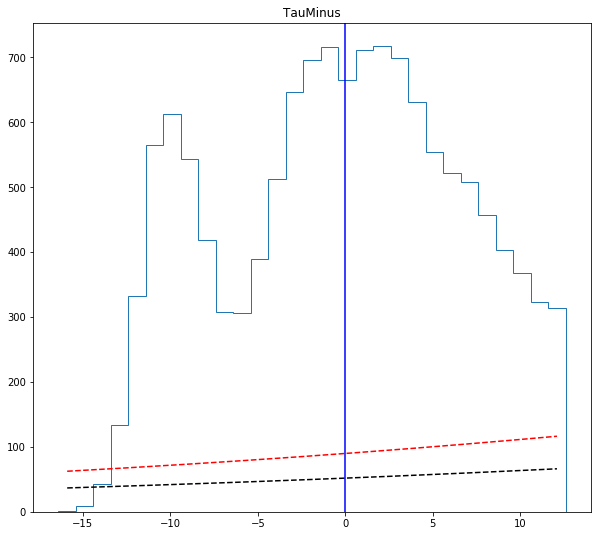

In [24]:
tau_timeDiff = ([])
tau_pVal = ([])
tau_LRR = ([])
tau_wid1_ratio = ([])
tau_wid2_ratio = ([])
tau_amp1_ratio = ([])
tau_amp2_ratio = ([])

e_timeDiff = ([])
e_pVal = ([])
e_LRR = ([])
e_wid1_ratio = ([])
e_wid2_ratio = ([])
e_amp1_ratio = ([])
e_amp2_ratio = ([])

tau_wid_ratio_dp = ([])
e_wid_ratio_dp = ([])
tau_amp_ratio_dp = ([])
e_amp_ratio_dp = ([])

break_all = False 
 
for i in range(96, 97):
    print('FILE NUMBER - ', i)
    file = dataio.I3File('/data/p-one/akatil/step_4_medium_water/NuTau_NuE_20Events/step_4_'+str(i)+'_medium_water_custom_mDOM_noise.i3.gz')
    #file = dataio.I3File(str(args.infile))

    f = 1
    for frame in file:
        print('frame num - ', f)
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

        '''
        Removing NC interations of the neutrino
        '''

        #if lepton.type == 12 or lepton.type == -12 or lepton.type == 16 or lepton.type == -16:
            #continue

        '''
        Lepton position
        '''
        #lepton_pos = lepton.pos
        #x_lepton_pos = lepton_pos.x
        #y_lepton_pos = lepton_pos.y
        #z_lepton_pos = lepton_pos.z

        mcpeMap = frame['MCPESeriesMap']
        noiseMap = frame['NoiseSeriesMap']

        #print('Finding OM Positions and time residuals')


        #looping through doms that have physics hits
        for omkey in mcpeMap.keys():
            oKey = omgeo.get(omkey)

            '''
            Dom Positons
            '''
            #domPos = oKey.position
            #x_dom = domPos.x
            #y_dom = domPos.y
            #z_dom = domPos.z

            '''
            Distance between event vertex and DOM
            '''
            #distance = np.sqrt((x_dom - x_lepton_pos)**2 + (y_dom - y_lepton_pos)**2 +
                               #(z_dom - z_lepton_pos)**2)

            #removing doms with distances > 100m from the event vertex
            #if distance > 200:
                #continue

            '''
            Obtaining the timeList
            '''
            noise_mcpeList = noiseMap[omkey]
            noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
            mcpeList = mcpeMap[omkey]
            timeList = np.array([mcpe.time for mcpe in mcpeList])
            tot_timeList = np.append(timeList, noise_timeList)


            '''
            Removing DOMs with hits less than 100
            '''
            if len(tot_timeList) < 250:
                continue


            '''
            Calculating the mean and removing the tails
            '''

            timeList = timeList[timeList < min(timeList)+30]

            mean_physicsHits = timeList.mean()
            mean_tot = tot_timeList.mean()

            select_time = tot_timeList[(tot_timeList > mean_physicsHits-50) & (tot_timeList < mean_physicsHits+50)]
            new_mean = select_time.mean()

            bins = np.arange(min(select_time), max(select_time), 1)
            max_hitTimes = select_time[(select_time > (new_mean-40))&(select_time < (new_mean+40))]

            z = stats.zscore(max_hitTimes)
            #using zscore to remove the effect of outliers from the analysis]
            max_hitTimes = max_hitTimes[(z < 1.2)]
            new_mean = max_hitTimes.mean()
            timestamps = max_hitTimes - new_mean
            final_mean = timestamps.mean()

            num_photons = len(max_hitTimes[max_hitTimes>0])

            if len(max_hitTimes) < 10:
                continue

            #if len(max_hitTimes) < 10:
                #continue

            #if np.log10(num_photons) >= 3.0 or np.log10(num_photons) < 2.5:
                #continue

            '''
            Histogramming the data from simulation
            '''

            bins = np.arange(min(timestamps), max(timestamps), 1)
            num, bin_edges = np.histogram(timestamps, bins=bins)
            bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

            '''
            Removing hits for DOMs that have more than 200 hits in 1 second bin.
            '''
            if max(num) > 175 or len(num) == 0:

                print('LOG LIKELIHOOD')

                '''
                Removing DOMs that don't have less than 8 non zero bins
                '''
                if len(num[num>0]) <= 8:
                    print('Removing DOMs that dont have less than 8 non zero bins')
                


                '''
                Fitting bifurcated Gaussian and double bifurcated gaussian to the mcpe hit time distributions
                for both tau and electron.
                '''

                nll = lambda *args: log_likelihood_biGauss(*args)
                initial_biGauss = np.array([final_mean, 20, 1, max(num)])
                #bnds_biGauss = ((min(bin_centers), mean_timeArrival), (0, 20), (0, 2), (0, max(num)), (mean_timeArrival, max(bin_centers)), (0, 20), (0, 2), (0, max(num)))

                #print(len(num), len(initial_biGauss), initial_biGauss)
                bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 100), (0, 10), (0, 1e6))
                print('----------BOUNDS-----------')
                print(bnds_biGauss)
                soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss, args=(num, bin_centers),
                                    method='Powell', bounds = bnds_biGauss)

                nll = lambda *args: log_likelihood_doublePeak(*args)
                initial_doublePeak = np.array([min(bin_centers), 20, 1, 10, final_mean, 20, 1, 10])
                bnds_doublePeak = ((min(bin_centers), final_mean), (0, 1e3), (0, 100), (0, 1e6),
                               (final_mean, max(bin_centers)), (0, 1e3), (0, 100), (0,1e6))
                soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak, args=(num, bin_centers),
                                       method='Powell',bounds=bnds_doublePeak)

                '''
                Removing DOMs whose minimization is not successful
                '''
                #if soln_biGauss.success == False or soln_doublePeak.success == False:
                #print('Removing DOMs whose minimization is not successful')
                #continue

                '''
                Calculating the Likelihood ratio for bifurcated gaussian and double double bifurcated gaussian
                '''
                LR_biGauss = likelihood_ratio_biGauss(bin_centers[num>0], num[num>0], soln_biGauss.x[0],
                                             soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
                LR_doublePeak = likelihood_ratio_doublePeak(bin_centers[num>0], num[num>0], soln_doublePeak.x[0], soln_doublePeak.x[1],
                                             soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                             soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])


                '''
                Calculating the p-value using the likelihood ratio
                '''
                pVal_biGauss = chi2.sf(LR_biGauss, len(num) - 4)
                pVal_doublePeak = chi2.sf(LR_doublePeak, len(num) - 8)

                if pVal_biGauss != pVal_biGauss:
                    print('BiGauss gives not well defined - ', str(lepton.type))
                    print('Minimisation - ', soln_biGauss.success)
                    print('Degrees of Freedom - ', len(num) - 4)
                    print('Log Likelihood - ', LR_biGauss)
                if pVal_doublePeak != pVal_doublePeak:
                    print('double peak gives not well defined - ', str(lepton.type))
                    print('Minimisation - ', soln_doublePeak.success)
                    print('Degrees of Freedom - ', len(num) - 8)
                    print('Log Likelihood - ', LR_doublePeak)


                '''
                (x, y) values for the fit
                '''
                x = np.linspace(min(bin_centers), max(bin_centers), 1000)
                #x = np.linspace(0, max(bin_centers)+1e5, 1000)
                y_biGauss = biGauss(x, soln_biGauss.x[0],
                                             soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
                y_doublePeak = double_peak(x, soln_doublePeak.x[0], soln_doublePeak.x[1],
                                             soln_doublePeak.x[2], soln_doublePeak.x[3], soln_doublePeak.x[4],
                                             soln_doublePeak.x[5], soln_doublePeak.x[6], soln_doublePeak.x[7])

                '''
                Calculating the time difference and p-value ratio of bigauss and double peak
                '''
                timeDifference_doublePeak = soln_doublePeak.x[4] - soln_doublePeak.x[0]
                pVal_ratio = pVal_doublePeak/pVal_biGauss
                LRR = LR_doublePeak/LR_biGauss
                wid1_ratio = soln_doublePeak.x[1]/soln_biGauss.x[1]
                wid2_ratio = soln_doublePeak.x[5]/soln_biGauss.x[1]
                amp1_ratio = soln_doublePeak.x[3]/soln_biGauss.x[3]
                amp2_ratio = soln_doublePeak.x[7]/soln_biGauss.x[3]
                wid1_wid2 = soln_doublePeak.x[1]/soln_doublePeak.x[5]
                amp1_amp2 = soln_doublePeak.x[3]/soln_doublePeak.x[7]



                '''
                Removing terrible fits
                '''
                if abs(timeDifference_doublePeak) > 100:
                    continue

                amp1 = soln_doublePeak.x[3]
                amp2 = soln_doublePeak.x[7]
                if amp1/amp2 < 1/4 and amp1/amp2 > 4:
                    print('Removing terrible fits')
                    continue

                if amp1 < 0 or amp2 < 0:
                    print('Error in amp')
                    continue
                
                print('Reached Here')


                '''
                plot mcpe time distributions obtained using simulations and the fits
                '''
                plt.figure(figsize=(10,9))
                _ = plt.hist(timestamps, bins=bins, histtype='step')
                plt.title(str(lepton.type))
                plt.plot(x, y_biGauss, '--', c = 'r')
                plt.plot(x, y_doublePeak, '--', c = 'k')
                plt.axvline(final_mean, c = 'b')



                '''
                Separating the time difference calculated above and appending the values
                '''

                '''
                Tau
                '''
                if lepton.type == 15 or lepton.type == -15:
                    tau_timeDiff = np.append(tau_timeDiff, timeDifference_doublePeak)
                    tau_pVal = np.append(tau_pVal, pVal_ratio)
                    tau_LRR = np.append(tau_LRR, LRR)
                    tau_wid1_ratio = np.append(tau_wid1_ratio, wid1_ratio)
                    tau_wid2_ratio = np.append(tau_wid2_ratio, wid2_ratio)
                    tau_amp1_ratio = np.append(tau_amp1_ratio, amp1_ratio)
                    tau_amp2_ratio = np.append(tau_amp2_ratio, amp2_ratio)

                    tau_wid_ratio_dp = np.append(tau_wid_ratio_dp, wid1_wid2)
                    tau_amp_ratio_dp = np.append(tau_amp_ratio_dp, amp1_amp2)
                    #plt.title('E')

                '''
                Electron and Neutral Current
                '''

                if lepton.type == 11 or lepton.type == -11 or lepton.type == 12 or lepton.type == -12 or lepton.type == 16 or lepton.type == -16:
                    
                    e_timeDiff = np.append(e_timeDiff, timeDifference_doublePeak)
                    e_pVal = np.append(e_pVal, pVal_ratio)
                    e_LRR = np.append(e_LRR, LRR)
                    e_wid1_ratio = np.append(e_wid1_ratio, wid1_ratio)
                    e_wid2_ratio = np.append(e_wid2_ratio, wid2_ratio)
                    e_amp1_ratio = np.append(e_amp1_ratio, amp1_ratio)
                    e_amp2_ratio = np.append(e_amp2_ratio, amp2_ratio)

                    e_wid_ratio_dp = np.append(e_wid_ratio_dp, wid1_wid2)
                    e_amp_ratio_dp = np.append(e_amp_ratio_dp, amp1_amp2)
                print('P-VAL CALCULATED')
                
                    
                break_all = True
                
                break
                
        if break_all:
            break
    if break_all:
        break



                    #plt.title('Tau')


                


        '''
        print(tot_timeList)

        bins = np.arange(min(tot_timeList), min(tot_timeList)+41, 1)
        num, bin_edges, _ = plt.hist(tot_timeList, bins=bins, histtype='step')
        plt.title('Tau')
        '''
        f = f+1

In [ ]:
def printMinimizer():